# Chapter 10: Introduction to Artificial Neural Networks with Keras

### Ensure GPU Env is working correctly

In [1]:
import tensorflow as tf
import os
from tensorflow import keras

In [2]:
tf.__version__

'2.1.0'

In [3]:
keras.__version__

'2.2.4-tf'

In [4]:
print("Num of GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num of GPUs Available:  1


In [5]:
import sys
import os
import warnings
warnings.filterwarnings("ignore")
sys.version

'3.6.13 |Anaconda, Inc.| (default, Mar 16 2021, 11:37:27) [MSC v.1916 64 bit (AMD64)]'

## Perceptrons 

The perceptron is a the simplest part of a neural network. it is linear machine learning algorithm for binary classification tasks. An example of a perceptron is shown below: 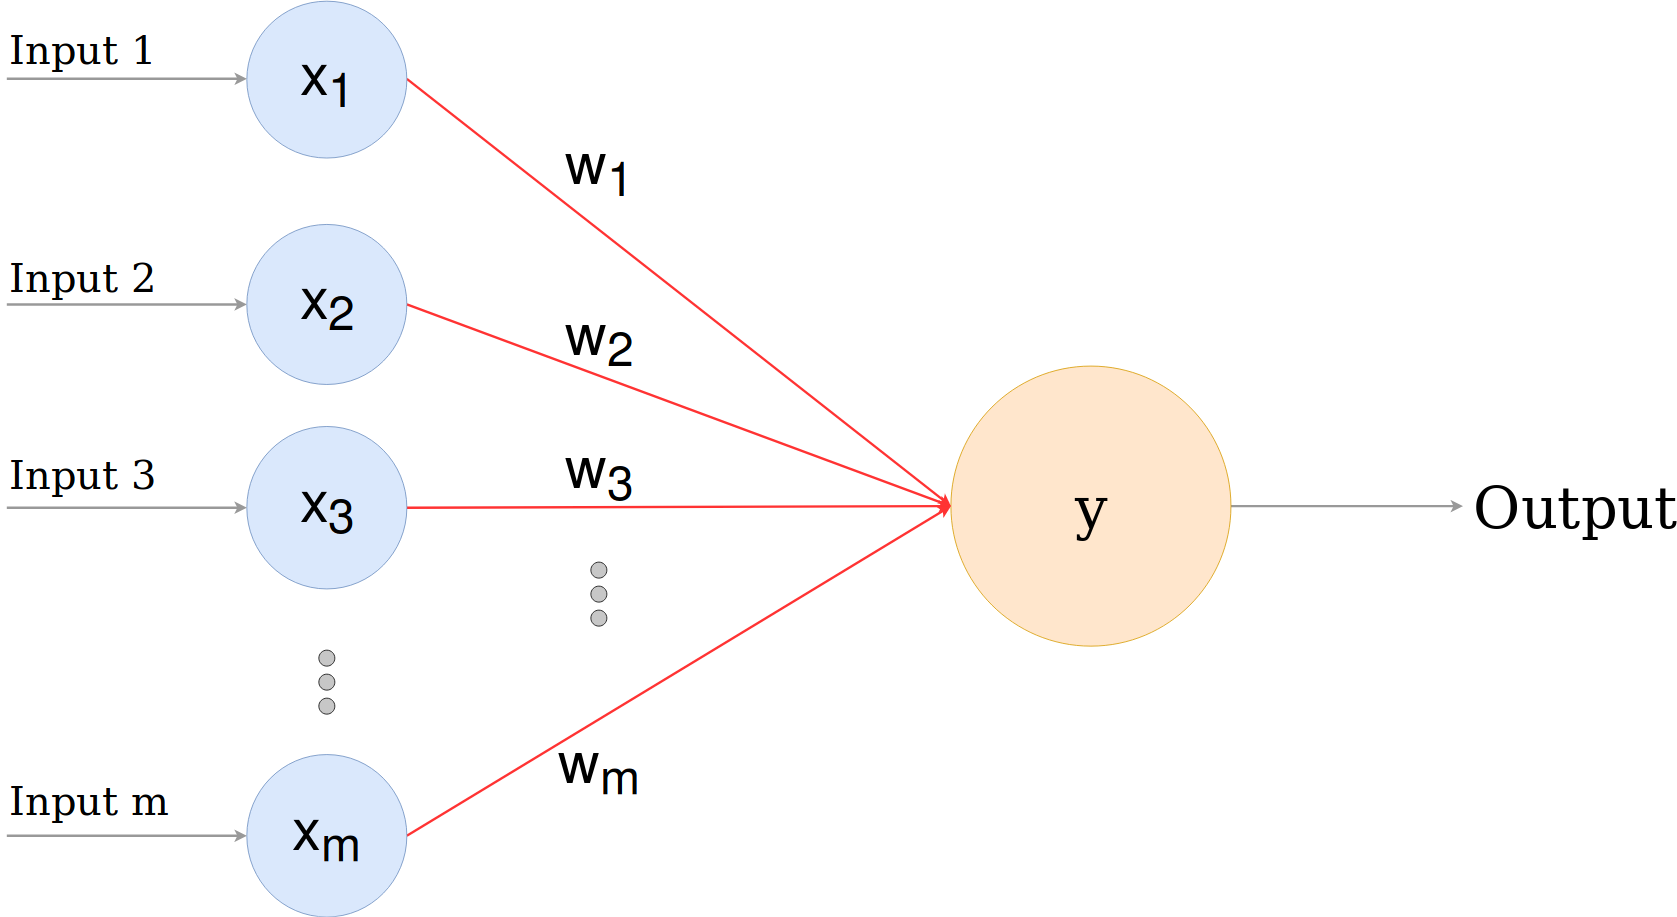

We will now use sklearn to implement a perceptron to classifier the iris dataset with petal length and petal width.

In [6]:
import numpy as np 
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)] # petal length and width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=1000, tol=1e-2)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [7]:
y_pred

array([0])

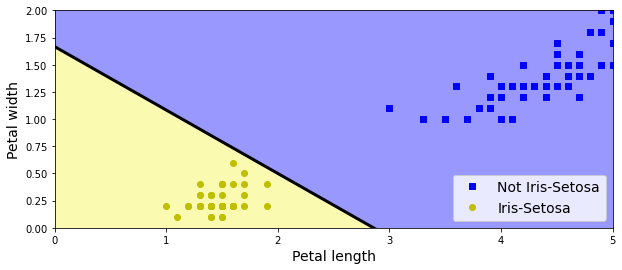

In [8]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]
axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 1000).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.show()

## Plots of Different Activation Functions in Neural Network Architectures

In [9]:
#functions for neural nets
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative_of_func(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

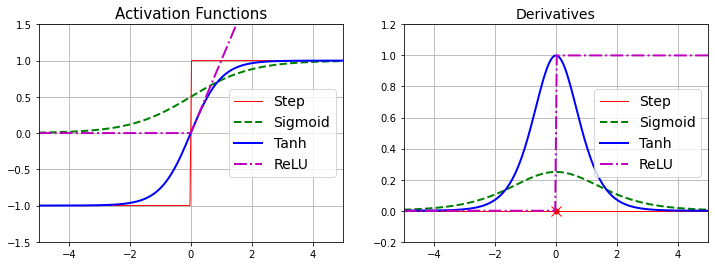

In [10]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth = 1, label = "Step")
plt.plot(z, sigmoid(z), "g--", linewidth = 2, label = "Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth = 2, label = "Tanh")
plt.plot(z, relu(z), "m-.", linewidth = 2, label = "ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation Functions", fontsize=15)
plt.axis([-5, 5, -1.5, 1.5])

plt.subplot(122)
plt.plot(z, derivative_of_func(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative_of_func(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative_of_func(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative_of_func(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

In [11]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

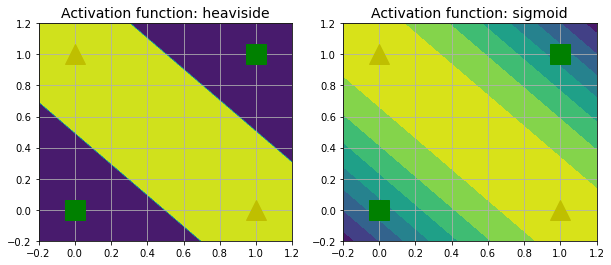

In [12]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

## Building an Image Classifier in Keras Shell in Tensorflow

We will build an image classifer using a different dataset. This one is from keras and is a fashion dataset with images split in pixels accordingly based on the piece of clothing.

In [13]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [14]:
# Shape of dataset
X_train_full.shape

(60000, 28, 28)

In [15]:
X_train_full.dtype

dtype('uint8')

We'll do a train-val-test split now and then divide our values by 255 to scale the pixel ratios as they are 255 pixel images.

In [16]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

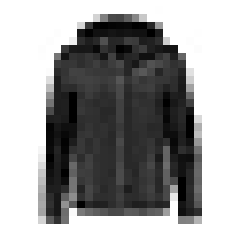

In [17]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The lables are the class IDs (represented as uint8), from 0 to 9:

In [18]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Now we need to create corresponding class names for this set, so lets do that in an array right now:

In [19]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [20]:
class_names[y_train[0]]

'Coat'

In [21]:
# Shapes of Validation and Test sets
print(X_valid.shape)
print(X_test.shape)

(5000, 28, 28)
(10000, 28, 28)


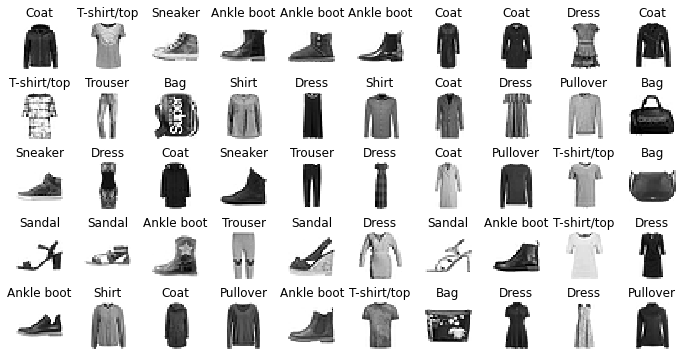

In [22]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Now time to build the model. We'll create a sequential model with a first layer to convert each input image to a 1D array. Then, we will follow it up with 2 Dense layers with relu activatoins functions and finally a output dense layer with 10 neurons with a softmax activation function. 

In [23]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [24]:
model.layers # model layers array

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


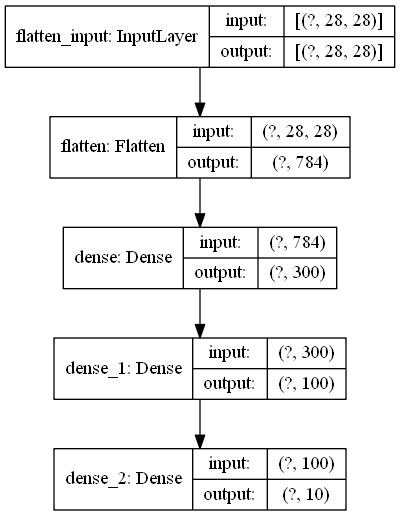

In [26]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

The reason it shows question marks is because we didn't set batch sizes for the model.

In [27]:
# Some other things that can be viewed
hidden1 = model.layers[1]
print(hidden1.name)
print(model.get_layer(hidden1.name) is hidden1)
weights, biases = hidden1.get_weights()
print(weights)

dense
True
[[-0.04072303  0.02818586 -0.05906986 ... -0.07144554  0.04997285
   0.01521179]
 [-0.03956556 -0.02049073 -0.04370243 ... -0.03947478  0.04447182
   0.05297169]
 [-0.04291168 -0.00898109  0.06424204 ...  0.04203054 -0.07276922
  -0.00648141]
 ...
 [-0.00180912  0.00553776 -0.04868077 ... -0.06696551  0.07227893
   0.04407913]
 [ 0.03341646  0.02270722  0.03876131 ...  0.03101095 -0.00564861
   0.0074928 ]
 [ 0.04312358  0.04764709  0.04154848 ...  0.036351   -0.01424
   0.04911801]]


In [28]:
weights.shape

(784, 300)

In [29]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [30]:
biases.shape

(300,)

In [31]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

The above code is equal to the following: 

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

In [32]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 57s 1ms/sample - loss: 0.7314 - accuracy: 0.7543 - val_loss: 0.5194 - val_accuracy: 0.8254
Epoch 2/30
55000/55000 [==============================] - 3s 58us/sample - loss: 0.4909 - accuracy: 0.8296 - val_loss: 0.4763 - val_accuracy: 0.8332
Epoch 3/30
55000/55000 [==============================] - 3s 57us/sample - loss: 0.4449 - accuracy: 0.8437 - val_loss: 0.4307 - val_accuracy: 0.8536
Epoch 4/30
55000/55000 [==============================] - 3s 57us/sample - loss: 0.4159 - accuracy: 0.8547 - val_loss: 0.3960 - val_accuracy: 0.8662
Epoch 5/30
55000/55000 [==============================] - 3s 58us/sample - loss: 0.3946 - accuracy: 0.8625 - val_loss: 0.3899 - val_accuracy: 0.8606
Epoch 6/30
55000/55000 [==============================] - 3s 58us/sample - loss: 0.3777 - accuracy: 0.8661 - val_loss: 0.3863 - val_accuracy: 0.8632
Epoch 7/30
55000/55000 [==============================] -

In [33]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [34]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [35]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

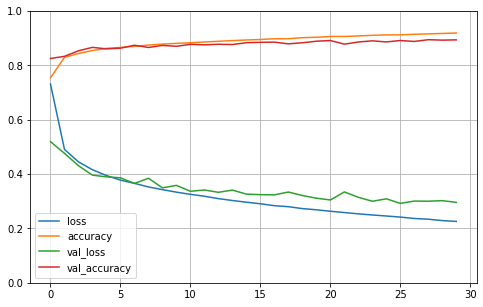

In [36]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [37]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 41us/sample - loss: 0.3356 - accuracy: 0.8843


[0.335556380045414, 0.8843]

In [38]:
X_new = X_test[:3]
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [39]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [40]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

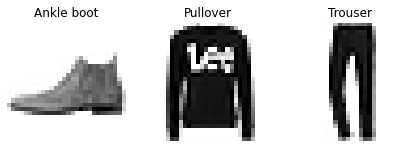

In [41]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Building a Regression MLP (multilayer perceptron)

Now we will build a regression neural net with the california housing dataset from scikit learn with a keras sequential model:

In [42]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [43]:
model = keras.models.Sequential([
    keras.layers.Dense(50, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=25, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/25
11610/11610 [==============================] - 1s 79us/sample - loss: 2.2280 - val_loss: 1.9954
Epoch 2/25
11610/11610 [==============================] - 1s 59us/sample - loss: 0.7575 - val_loss: 0.6885
Epoch 3/25
11610/11610 [==============================] - 1s 60us/sample - loss: 0.6750 - val_loss: 0.6646
Epoch 4/25
11610/11610 [==============================] - 1s 57us/sample - loss: 0.6343 - val_loss: 0.6084
Epoch 5/25
11610/11610 [==============================] - 1s 62us/sample - loss: 0.6001 - val_loss: 0.5848
Epoch 6/25
11610/11610 [==============================] - 1s 62us/sample - loss: 0.5707 - val_loss: 0.5912
Epoch 7/25
11610/11610 [==============================] - 1s 64us/sample - loss: 0.5463 - val_loss: 0.5428
Epoch 8/25
11610/11610 [==============================] - 1s 57us/sample - loss: 0.5249 - val_loss: 0.5172
Epoch 9/25
11610/11610 [==============================] - 1s 55us/sample - loss: 0.5074 - val_l

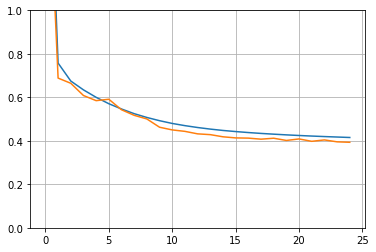

In [44]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [45]:
y_pred

array([[0.5472129],
       [1.6834185],
       [3.4440737]], dtype=float32)

In [46]:
model.evaluate(X_test, y_test)

5160/5160 [==============================] - 0s 34us/sample - loss: 0.4059


0.40587604313857795

## Functional API to Build a Wide & Deep Neural Network

In [47]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

The above code looks something like this: 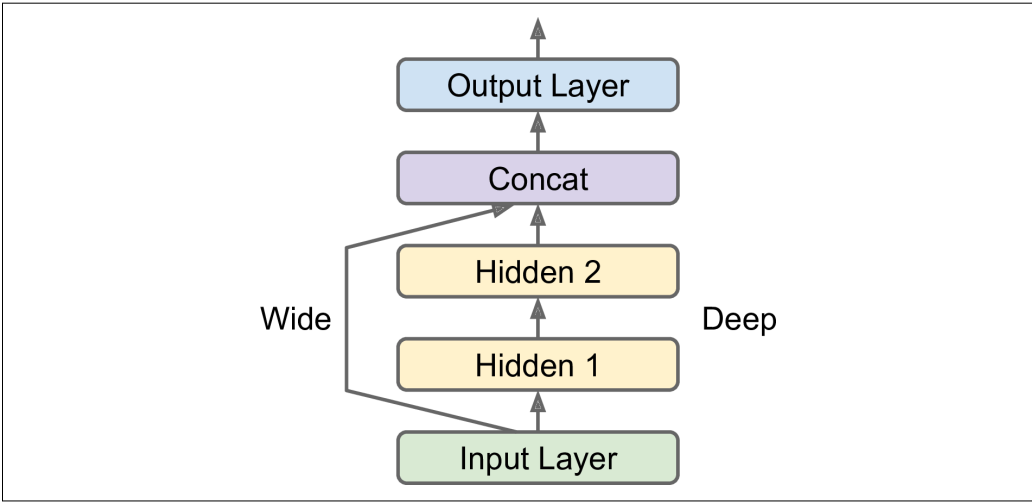

In [48]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_6[0][0]                

In [49]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 85us/sample - loss: 2.1009 - val_loss: 4.4723
Epoch 2/20
11610/11610 [==============================] - 1s 67us/sample - loss: 0.7627 - val_loss: 1.2052
Epoch 3/20
11610/11610 [==============================] - 1s 65us/sample - loss: 0.6644 - val_loss: 0.8405
Epoch 4/20
11610/11610 [==============================] - 1s 71us/sample - loss: 0.6160 - val_loss: 0.5817
Epoch 5/20
11610/11610 [==============================] - 1s 64us/sample - loss: 0.5755 - val_loss: 0.5622
Epoch 6/20
11610/11610 [==============================] - 1s 63us/sample - loss: 0.5471 - val_loss: 0.5304
Epoch 7/20
11610/11610 [==============================] - 1s 64us/sample - loss: 0.5229 - val_loss: 0.4911
Epoch 8/20
11610/11610 [==============================] - 1s 67us/sample - loss: 0.5033 - val_loss: 0.4691
Epoch 9/20
11610/11610 [==============================] - 1s 63us/sample - loss: 0.4873 - val_l

Now we will build a model with a subset of the features being passed through the wide path and a different subset in the deep path:

In [50]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [51]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 87us/sample - loss: 2.0597 - val_loss: 1.3105
Epoch 2/20
11610/11610 [==============================] - 1s 61us/sample - loss: 0.8339 - val_loss: 1.0524
Epoch 3/20
11610/11610 [==============================] - 1s 65us/sample - loss: 0.7042 - val_loss: 0.7389
Epoch 4/20
11610/11610 [==============================] - 1s 66us/sample - loss: 0.6500 - val_loss: 0.6261
Epoch 5/20
11610/11610 [==============================] - 1s 66us/sample - loss: 0.6137 - val_loss: 0.5757
Epoch 6/20
11610/11610 [==============================] - 1s 67us/sample - loss: 0.5862 - val_loss: 0.5518
Epoch 7/20
11610/11610 [==============================] - 1s 68us/sample - loss: 0.5630 - val_loss: 0.5347
Epoch 8/20
11610/11610 [==============================] - 1s 69us/sample - loss: 0.5439 - val_loss: 0.5172
Epoch 9/20
11610/11610 [==============================] - 1s 77us/sample - loss: 0.5271 - val_l

In [52]:
mse_test #performance so far

0.44028191714323767

### Multiple Outputs in a neural net

Now we will add extra outputs to a neural net. In this case, anauxiliary output for regularization:

In [53]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

Now we will need to pass each output with its own loss function and loss weights. We will do this with a stochastic gradient descent optimizer and retrain the model with labels for each output. 

In [54]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [55]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 133us/sample - loss: 2.7251 - main_output_loss: 2.5069 - aux_output_loss: 4.6844 - val_loss: 1.5818 - val_main_output_loss: 1.3529 - val_aux_output_loss: 3.6388
Epoch 2/20
11610/11610 [==============================] - 1s 86us/sample - loss: 1.0886 - main_output_loss: 0.8679 - aux_output_loss: 3.0728 - val_loss: 0.9003 - val_main_output_loss: 0.7288 - val_aux_output_loss: 2.4430
Epoch 3/20
11610/11610 [==============================] - 1s 80us/sample - loss: 0.8339 - main_output_loss: 0.6786 - aux_output_loss: 2.2319 - val_loss: 0.7616 - val_main_output_loss: 0.6246 - val_aux_output_loss: 1.9929
Epoch 4/20
11610/11610 [==============================] - 1s 80us/sample - loss: 0.7389 - main_output_loss: 0.6198 - aux_output_loss: 1.8087 - val_loss: 0.7172 - val_main_output_loss: 0.5983 - val_aux_output_loss: 1.7851
Epoch 5/20
11610/11610 [==============================] - 1s 82us/

In [56]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

5160/5160 [==============================] - 0s 45us/sample - loss: 0.4947 - main_output_loss: 0.4391 - aux_output_loss: 0.9991


## Building a Python Subclass with the Keras API 

Now we will similar to what we did above with a wide and deep model only this time we will build it using the keras API. We build a python class to help us with this task and run a model object to do the same step we just previously did:

In [57]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [58]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'
Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 120us/sample - loss: 2.7301 - output_1_loss: 2.3970 - output_2_loss: 5.7196 - val_loss: 3.7088 - val_output_1_loss: 3.5199 - val_output_2_loss: 5.3958
Epoch 2/10
11610/11610 [==============================] - 1s 81us/sample - loss: 1.2456 - output_1_loss: 0.9514 - output_2_loss: 3.8925 - val_loss: 1.4109 - val_output_1_loss: 0.8791 - val_output_2_loss: 6.1931
Epoch 3/10
11610/11610 [==============================] - 1s 80us/sample - loss: 0.9340 - output_1_loss: 0

## Being able to save and restore a model with keras

In [59]:
# Start by building a simple sequential model with 1 hidden layer
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])   

In [60]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 83us/sample - loss: 1.9729 - val_loss: 1.6628
Epoch 2/10
11610/11610 [==============================] - 1s 65us/sample - loss: 0.6958 - val_loss: 0.6909
Epoch 3/10
11610/11610 [==============================] - 1s 58us/sample - loss: 0.5713 - val_loss: 0.5416
Epoch 4/10
11610/11610 [==============================] - 1s 57us/sample - loss: 0.5321 - val_loss: 0.4906
Epoch 5/10
11610/11610 [==============================] - 1s 61us/sample - loss: 0.5054 - val_loss: 0.4636
Epoch 6/10
11610/11610 [==============================] - 1s 64us/sample - loss: 0.4850 - val_loss: 0.4464
Epoch 7/10
11610/11610 [==============================] - 1s 65us/sample - loss: 0.4690 - val_loss: 0.4372
Epoch 8/10
11610/11610 [==============================] - 1s 65us/sample - loss: 0.4564 - val_loss: 0.4334
Epoch 9/10
11610/11610 [==============================] - 1s 70us/sample - loss: 0.4462 - val_l

In [61]:
# how to simply save a keras neural network model
model.save("my_keras_model.h5")

In [62]:
# how to simply load the model into the notebook from the file directory
model = keras.models.load_model("my_keras_model.h5")

In [63]:
# using the model to predict
model.predict(X_new)

array([[0.68682075],
       [1.4693861 ],
       [3.330238  ]], dtype=float32)

As another useful resouce, you can also save and load the weights from the model to reuse as well

In [64]:
model.save_weights("my_keras_weights.ckpt")

In [65]:
model.load_weights("my_keras_weights.ckpt")

## Using Callbacks while training the model

In [66]:
# build a simple model 
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])  

In [67]:
# use model checkpoints to save progress of epoch training in case system crashes or something else happens
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True) #NOTE: We only save the best results from training
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 87us/sample - loss: 2.1072 - val_loss: 1.7776
Epoch 2/10
11610/11610 [==============================] - 1s 62us/sample - loss: 0.7669 - val_loss: 0.8134
Epoch 3/10
11610/11610 [==============================] - 1s 66us/sample - loss: 0.6748 - val_loss: 0.6226
Epoch 4/10
11610/11610 [==============================] - 1s 65us/sample - loss: 0.6362 - val_loss: 0.5938
Epoch 5/10
11610/11610 [==============================] - 1s 64us/sample - loss: 0.6070 - val_loss: 0.5740
Epoch 6/10
11610/11610 [==============================] - 1s 66us/sample - loss: 0.5814 - val_loss: 0.5441
Epoch 7/10
11610/11610 [==============================] - 1s 73us/sample - loss: 0.5581 - val_loss: 0.5219
Epoch 8/10
11610/11610 [==============================] - 1s 62us/sample - loss: 0.5366 - val_loss: 0.5030
Epoch 9/10
11610/11610 [==============================] - 1s 63us/sample - loss: 0.5175 - val_l

In [68]:
mse_test

0.4809646786645401

In [69]:
#using early stopping if no improvement after 10 epochs
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True) 
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 82us/sample - loss: 0.4840 - val_loss: 0.4462
Epoch 2/100
11610/11610 [==============================] - 1s 59us/sample - loss: 0.4702 - val_loss: 0.4380
Epoch 3/100
11610/11610 [==============================] - 1s 59us/sample - loss: 0.4588 - val_loss: 0.4261
Epoch 4/100
11610/11610 [==============================] - 1s 62us/sample - loss: 0.4486 - val_loss: 0.4235
Epoch 5/100
11610/11610 [==============================] - 1s 65us/sample - loss: 0.4400 - val_loss: 0.4196
Epoch 6/100
11610/11610 [==============================] - 1s 66us/sample - loss: 0.4328 - val_loss: 0.4174
Epoch 7/100
11610/11610 [==============================] - 1s 66us/sample - loss: 0.4267 - val_loss: 0.4316
Epoch 8/100
11610/11610 [==============================] - 1s 66us/sample - loss: 0.4211 - val_loss: 0.4410
Epoch 9/100
11610/11610 [==============================] - 1s 66us/sample - loss: 0.416

### Building our own class to print out the validation/training ratio for our loss function for callbacks

In [70]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [71]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

Train on 11610 samples, validate on 3870 samples
10752/11610 [==========================>...] - ETA: 0s - loss: 0.4257
val/train: 0.99
11610/11610 [==============================] - 1s 65us/sample - loss: 0.4264 - val_loss: 0.4229


## Introduction to TensorBoard

In [72]:
import os 
root_logdir = os.path.join(os.curdir, "my_logs")

In [73]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2022_01_09-18_15_00'

In [74]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [75]:
# Logging our callbacks to the tensorboard object using our directory
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 1s 107us/sample - loss: 2.3796 - val_loss: 1.0007
Epoch 2/30
11610/11610 [==============================] - 1s 87us/sample - loss: 0.8962 - val_loss: 0.7174
Epoch 3/30
11610/11610 [==============================] - 1s 75us/sample - loss: 0.6933 - val_loss: 0.6088
Epoch 4/30
11610/11610 [==============================] - 1s 80us/sample - loss: 0.6158 - val_loss: 0.5594
Epoch 5/30
11610/11610 [==============================] - 1s 76us/sample - loss: 0.5720 - val_loss: 0.5541
Epoch 6/30
11610/11610 [==============================] - 1s 76us/sample - loss: 0.5387 - val_loss: 0.5434
Epoch 7/30
11610/11610 [==============================] - 1s 78us/sample - loss: 0.5122 - val_loss: 0.4762
Epoch 8/30
11610/11610 [==============================] - 1s 79us/sample - loss: 0.4907 - val_loss: 0.4674
Epoch 9/30
11610/11610 [==============================] - 1s 80us/sample - loss: 0.4730 - val_

Now we will load tensorboard manually into our jupyter notebook:

In [76]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

Reusing TensorBoard on port 6006 (pid 1808), started 0:27:28 ago. (Use '!kill 1808' to kill it.)

In [77]:
run_logdir2 = get_run_logdir()
run_logdir2

'.\\my_logs\\run_2022_01_09-18_15_29'

In [78]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.05))

In [79]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 1s 113us/sample - loss: 0.5392 - val_loss: 2.2308
Epoch 2/30
11610/11610 [==============================] - 1s 74us/sample - loss: 0.4373 - val_loss: 0.3594
Epoch 3/30
11610/11610 [==============================] - 1s 71us/sample - loss: 0.5042 - val_loss: 0.3959
Epoch 4/30
11610/11610 [==============================] - 1s 83us/sample - loss: 0.3746 - val_loss: 0.3394
Epoch 5/30
11610/11610 [==============================] - 1s 72us/sample - loss: 0.3566 - val_loss: 0.3280
Epoch 6/30
11610/11610 [==============================] - 1s 80us/sample - loss: 0.3462 - val_loss: 0.8118
Epoch 7/30
11610/11610 [==============================] - 1s 81us/sample - loss: 0.3482 - val_loss: 0.4881
Epoch 8/30
11610/11610 [==============================] - 1s 75us/sample - loss: 0.3361 - val_loss: 0.3877
Epoch 9/30
11610/11610 [==============================] - 1s 84us/sample - loss: 0.3331 - val_

Now we can look again at tensorboard:

In [80]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 1808), started 0:27:57 ago. (Use '!kill 1808' to kill it.)

## Neural Network Hyperparameter Tuning

In [81]:
# Create function manually to build us a model with a custom learning rate
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [82]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model) # still keras under a scikit learn wrapper for a regressor model

In [83]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 80us/sample - loss: 1.2291 - val_loss: 3.0417
Epoch 2/100
11610/11610 [==============================] - 1s 75us/sample - loss: 0.5326 - val_loss: 0.4553
Epoch 3/100
11610/11610 [==============================] - 1s 60us/sample - loss: 0.4683 - val_loss: 0.4181
Epoch 4/100
11610/11610 [==============================] - 1s 59us/sample - loss: 0.4447 - val_loss: 0.4067
Epoch 5/100
11610/11610 [==============================] - 1s 64us/sample - loss: 0.4320 - val_loss: 0.4244
Epoch 6/100
11610/11610 [==============================] - 1s 60us/sample - loss: 0.4231 - val_loss: 0.4109
Epoch 7/100
11610/11610 [==============================] - 1s 63us/sample - loss: 0.4180 - val_loss: 0.4328
Epoch 8/100
11610/11610 [==============================] - 1s 58us/sample - loss: 0.4111 - val_loss: 0.4427
Epoch 9/100
11610/11610 [==============================] - 1s 66us/sample - loss: 0.407

In [84]:
mse_test = keras_reg.score(X_test, y_test)

5160/5160 [==============================] - 0s 35us/sample - loss: 0.3446


In [85]:
y_pred = keras_reg.predict(X_new)

In [86]:
y_pred

array([0.65689814, 1.5495439 , 4.06317   ], dtype=float32)

In [87]:
mse_test

-0.34460847082064133

Now with our created model. lets use grid search to find us optimal parameters we will need:

In [88]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100)               .tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2)      .rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=50, cv=5, verbose=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Train on 9288 samples, validate on 3870 samples
Epoch 1/100
9288/9288 [==============================] - 1s 82us/sample - loss: 2.0921 - val_loss: 155.7743
Epoch 2/100
9288/9288 [==============================] - 1s 71us/sample - loss: 4.3938 - val_loss: 306.9512
Epoch 3/100
9288/9288 [==============================] - 1s 72us/sample - loss: 4.8927 - val_loss: 892.0719
Epoch 4/100
9288/9288 [==============================] - 1s 72us/sample - loss: 6.2895 - val_loss: 3233.7001
Epoch 5/100
9288/9288 [==============================] - 1s 60us/sample - loss: 21.2285 - val_loss: 8193.9742
Epoch 6/100
9288/9288 [==============================] - 1s 55us/sample - loss: 114.8909 - val_loss: 22572.0240
Epoch 7/100
9288/9288 [==============================] - 1s 68us/sample - loss: 166.0599 - val_loss: 60507.4180
Epoch 8/100
9288/9288 [==============================] - 1s 62us/sample - loss: 908.3290 - val_loss: 164538.3430
Epoch 9/10

9288/9288 [==============================] - 1s 97us/sample - loss: 0.7525 - val_loss: 1.1349
Epoch 2/100
9288/9288 [==============================] - 1s 71us/sample - loss: 0.4026 - val_loss: 0.7763
Epoch 3/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.3770 - val_loss: 0.7108
Epoch 4/100
9288/9288 [==============================] - 1s 70us/sample - loss: 0.3609 - val_loss: 1.8481
Epoch 5/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.3920 - val_loss: 0.4195
Epoch 6/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.3541 - val_loss: 2.0313
Epoch 7/100
9288/9288 [==============================] - 1s 67us/sample - loss: 0.3645 - val_loss: 1.6247
Epoch 8/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.3562 - val_loss: 0.3269
Epoch 9/100
9288/9288 [==============================] - 1s 72us/sample - loss: 0.3346 - val_loss: 0.3111
Epoch 10/100
9288/9288 [==============================] - 

2322/2322 [==============================] - 0s 38us/sample - loss: 0.2913
[CV 4/5] END learning_rate=0.011858962637622806, n_hidden=3, n_neurons=75;, score=-0.291 total time=  19.0s
Train on 9288 samples, validate on 3870 samples
Epoch 1/100
9288/9288 [==============================] - 1s 98us/sample - loss: 0.8029 - val_loss: 3.4046
Epoch 2/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.5200 - val_loss: 0.6997
Epoch 3/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.3817 - val_loss: 0.7055
Epoch 4/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.3586 - val_loss: 1.9657
Epoch 5/100
9288/9288 [==============================] - 1s 67us/sample - loss: 0.3631 - val_loss: 3.1439
Epoch 6/100
9288/9288 [==============================] - 1s 70us/sample - loss: 0.3667 - val_loss: 1.9357
Epoch 7/100
9288/9288 [==============================] - 1s 75us/sample - loss: 0.3442 - val_loss: 2.3098
Epoch 8/100
9288/9288 [====

Epoch 21/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.2870 - val_loss: 0.2884
Epoch 22/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.2859 - val_loss: 0.6147
Epoch 23/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.2847 - val_loss: 0.3654
Epoch 24/100
9288/9288 [==============================] - 1s 66us/sample - loss: 0.2840 - val_loss: 0.3332
Epoch 25/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.2815 - val_loss: 0.2833
Epoch 26/100
9288/9288 [==============================] - 1s 66us/sample - loss: 0.2751 - val_loss: 0.3540
Epoch 27/100
9288/9288 [==============================] - 1s 67us/sample - loss: 0.2759 - val_loss: 0.3756
Epoch 28/100
9288/9288 [==============================] - 1s 67us/sample - loss: 0.2733 - val_loss: 0.2939
Epoch 29/100
9288/9288 [==============================] - 1s 81us/sample - loss: 0.2712 - val_loss: 0.3110
Epoch 30/100
9288/9288 [=============

9288/9288 [==============================] - 1s 77us/sample - loss: 0.2552 - val_loss: 0.2843
Epoch 48/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.2544 - val_loss: 0.3440
Epoch 49/100
9288/9288 [==============================] - 1s 58us/sample - loss: 0.2555 - val_loss: 0.2671
Epoch 50/100
9288/9288 [==============================] - 1s 61us/sample - loss: 0.2560 - val_loss: 0.4602
Epoch 51/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.2557 - val_loss: 0.3465
Epoch 52/100
2322/2322 [==============================] - 0s 32us/sample - loss: 0.3044
[CV 5/5] END learning_rate=0.029237254345484322, n_hidden=2, n_neurons=50;, score=-0.304 total time=  32.5s
Train on 9288 samples, validate on 3870 samples
Epoch 1/100
9288/9288 [==============================] - 1s 86us/sample - loss: 1.7898 - val_loss: 2.0743
Epoch 2/100
9288/9288 [==============================] - 1s 59us/sample - loss: 0.7602 - val_loss: 1.5860
Epoch 3/100
9288/9288 

Epoch 13/100
9288/9288 [==============================] - 1s 55us/sample - loss: 0.5505 - val_loss: 4.9770
Epoch 14/100
9288/9288 [==============================] - 1s 63us/sample - loss: 0.6244 - val_loss: 10.2419
Epoch 15/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.5716 - val_loss: 0.5179
Epoch 16/100
9288/9288 [==============================] - 1s 70us/sample - loss: 0.5711 - val_loss: 0.6448
Epoch 17/100
9288/9288 [==============================] - 1s 71us/sample - loss: 0.5558 - val_loss: 0.4954
Epoch 18/100
9288/9288 [==============================] - 1s 61us/sample - loss: 0.5592 - val_loss: 0.5630
Epoch 19/100
9288/9288 [==============================] - 1s 62us/sample - loss: 0.5556 - val_loss: 0.8130
Epoch 20/100
9288/9288 [==============================] - 1s 59us/sample - loss: 0.5781 - val_loss: 3.4995
Epoch 21/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.5523 - val_loss: 12.3176
Epoch 22/100
9288/9288 [===========

9288/9288 [==============================] - 1s 67us/sample - loss: 0.3429 - val_loss: 0.3582
Epoch 48/100
9288/9288 [==============================] - 1s 67us/sample - loss: 0.3422 - val_loss: 0.3657
Epoch 49/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.3415 - val_loss: 0.3612
Epoch 50/100
9288/9288 [==============================] - 1s 70us/sample - loss: 0.3407 - val_loss: 0.3504
Epoch 51/100
9288/9288 [==============================] - 1s 69us/sample - loss: 0.3399 - val_loss: 0.3642
Epoch 52/100
9288/9288 [==============================] - 1s 71us/sample - loss: 0.3391 - val_loss: 0.3696
Epoch 53/100
9288/9288 [==============================] - 1s 67us/sample - loss: 0.3386 - val_loss: 0.3690
Epoch 54/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.3380 - val_loss: 0.3470
Epoch 55/100
9288/9288 [==============================] - 1s 69us/sample - loss: 0.3372 - val_loss: 0.3572
Epoch 56/100
9288/9288 [==========================

9288/9288 [==============================] - 1s 68us/sample - loss: 0.3541 - val_loss: 0.3859
Epoch 37/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.3532 - val_loss: 0.3625
Epoch 38/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.3519 - val_loss: 0.3818
Epoch 39/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.3512 - val_loss: 0.3735
Epoch 40/100
9288/9288 [==============================] - 1s 70us/sample - loss: 0.3507 - val_loss: 0.3409
Epoch 41/100
9288/9288 [==============================] - 1s 69us/sample - loss: 0.3495 - val_loss: 0.3414
Epoch 42/100
9288/9288 [==============================] - 1s 72us/sample - loss: 0.3481 - val_loss: 0.3756
Epoch 43/100
9288/9288 [==============================] - 1s 71us/sample - loss: 0.3480 - val_loss: 0.3444
Epoch 44/100
9288/9288 [==============================] - 1s 71us/sample - loss: 0.3467 - val_loss: 0.3720
Epoch 45/100
9288/9288 [==========================

9288/9288 [==============================] - 1s 66us/sample - loss: 0.8585 - val_loss: 2.3813
Epoch 4/100
9288/9288 [==============================] - 1s 69us/sample - loss: 0.7698 - val_loss: 1.4162
Epoch 5/100
9288/9288 [==============================] - 1s 74us/sample - loss: 0.7201 - val_loss: 0.9591
Epoch 6/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.6882 - val_loss: 0.7308
Epoch 7/100
9288/9288 [==============================] - 1s 59us/sample - loss: 0.6653 - val_loss: 0.6484
Epoch 8/100
9288/9288 [==============================] - 1s 61us/sample - loss: 0.6481 - val_loss: 0.6277
Epoch 9/100
9288/9288 [==============================] - 1s 62us/sample - loss: 0.6336 - val_loss: 0.6187
Epoch 10/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.6207 - val_loss: 0.6201
Epoch 11/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.6089 - val_loss: 0.6245
Epoch 12/100
9288/9288 [==============================] 

9288/9288 [==============================] - 1s 70us/sample - loss: 0.4217 - val_loss: 1.9945
Epoch 60/100
9288/9288 [==============================] - 1s 70us/sample - loss: 0.4207 - val_loss: 2.0052
Epoch 61/100
9288/9288 [==============================] - 1s 71us/sample - loss: 0.4194 - val_loss: 1.9868
Epoch 62/100
9288/9288 [==============================] - 1s 70us/sample - loss: 0.4189 - val_loss: 1.9768
Epoch 63/100
9288/9288 [==============================] - 1s 71us/sample - loss: 0.4185 - val_loss: 1.9946
Epoch 64/100
9288/9288 [==============================] - 1s 71us/sample - loss: 0.4176 - val_loss: 2.0064
Epoch 65/100
9288/9288 [==============================] - 1s 71us/sample - loss: 0.4170 - val_loss: 1.9915
Epoch 66/100
9288/9288 [==============================] - 1s 70us/sample - loss: 0.4162 - val_loss: 1.9831
Epoch 67/100
9288/9288 [==============================] - 1s 70us/sample - loss: 0.4155 - val_loss: 1.9927
Epoch 68/100
9288/9288 [==========================

9288/9288 [==============================] - 1s 67us/sample - loss: 0.4037 - val_loss: 0.4010
Epoch 62/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.4031 - val_loss: 0.4000
Epoch 63/100
9288/9288 [==============================] - 1s 66us/sample - loss: 0.4024 - val_loss: 0.3969
Epoch 64/100
9288/9288 [==============================] - 1s 67us/sample - loss: 0.4018 - val_loss: 0.3967
Epoch 65/100
9288/9288 [==============================] - 1s 67us/sample - loss: 0.4012 - val_loss: 0.3990
Epoch 66/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.4005 - val_loss: 0.3984
Epoch 67/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.3999 - val_loss: 0.4008
Epoch 68/100
9288/9288 [==============================] - 1s 69us/sample - loss: 0.3994 - val_loss: 0.3981
Epoch 69/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.3988 - val_loss: 0.3984
Epoch 70/100
9288/9288 [==========================

9288/9288 [==============================] - 1s 65us/sample - loss: 0.4761 - val_loss: 0.4668
Epoch 13/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.4676 - val_loss: 0.4687
Epoch 14/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.4603 - val_loss: 0.4499
Epoch 15/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.4539 - val_loss: 0.4493
Epoch 16/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.4481 - val_loss: 0.4415
Epoch 17/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.4429 - val_loss: 0.4407
Epoch 18/100
9288/9288 [==============================] - 1s 63us/sample - loss: 0.4382 - val_loss: 0.4462
Epoch 19/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.4341 - val_loss: 0.4399
Epoch 20/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.4303 - val_loss: 0.4300
Epoch 21/100
9288/9288 [==========================

9288/9288 [==============================] - 1s 65us/sample - loss: 0.4737 - val_loss: 0.4444
Epoch 6/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.4545 - val_loss: 0.4525
Epoch 7/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.4436 - val_loss: 0.5036
Epoch 8/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.4354 - val_loss: 0.4999
Epoch 9/100
9288/9288 [==============================] - 1s 66us/sample - loss: 0.4302 - val_loss: 0.4043
Epoch 10/100
9288/9288 [==============================] - 1s 67us/sample - loss: 0.4248 - val_loss: 0.4803
Epoch 11/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.4210 - val_loss: 0.3964
Epoch 12/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.4175 - val_loss: 0.4529
Epoch 13/100
9288/9288 [==============================] - 1s 67us/sample - loss: 0.4143 - val_loss: 0.4075
Epoch 14/100
9288/9288 [==============================

9288/9288 [==============================] - 1s 65us/sample - loss: 0.3881 - val_loss: 0.3544
Epoch 28/100
9288/9288 [==============================] - 1s 67us/sample - loss: 0.3864 - val_loss: 0.4182
Epoch 29/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.3851 - val_loss: 0.3545
Epoch 30/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.3827 - val_loss: 0.3593
Epoch 31/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.3820 - val_loss: 0.3507
Epoch 32/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.3806 - val_loss: 0.3871
Epoch 33/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.3798 - val_loss: 0.3837
Epoch 34/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.3793 - val_loss: 0.3475
Epoch 35/100
9288/9288 [==============================] - 1s 66us/sample - loss: 0.3778 - val_loss: 0.3565
Epoch 36/100
9288/9288 [==========================

9288/9288 [==============================] - 1s 66us/sample - loss: 0.4316 - val_loss: 0.4062
Epoch 56/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.4304 - val_loss: 0.4051
Epoch 57/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.4292 - val_loss: 0.4034
Epoch 58/100
9288/9288 [==============================] - 1s 66us/sample - loss: 0.4282 - val_loss: 0.4038
Epoch 59/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.4270 - val_loss: 0.4067
Epoch 60/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.4260 - val_loss: 0.4026
Epoch 61/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.4250 - val_loss: 0.4046
Epoch 62/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.4240 - val_loss: 0.4027
Epoch 63/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.4230 - val_loss: 0.4061
Epoch 64/100
9288/9288 [==========================

9288/9288 [==============================] - 1s 66us/sample - loss: 0.6244 - val_loss: 0.5861
Epoch 16/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.6150 - val_loss: 0.5701
Epoch 17/100
9288/9288 [==============================] - 1s 66us/sample - loss: 0.6059 - val_loss: 0.5628
Epoch 18/100
9288/9288 [==============================] - 1s 66us/sample - loss: 0.5973 - val_loss: 0.5522
Epoch 19/100
9288/9288 [==============================] - 1s 66us/sample - loss: 0.5891 - val_loss: 0.5461
Epoch 20/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.5812 - val_loss: 0.5366
Epoch 21/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.5737 - val_loss: 0.5272
Epoch 22/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.5664 - val_loss: 0.5209
Epoch 23/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.5595 - val_loss: 0.5123
Epoch 24/100
9288/9288 [==========================

[CV 5/5] END learning_rate=0.0004865926131115961, n_hidden=1, n_neurons=37;, score=-0.439 total time= 1.0min
Train on 9288 samples, validate on 3870 samples
Epoch 1/100
9288/9288 [==============================] - 1s 85us/sample - loss: 1.0592 - val_loss: 14.3954
Epoch 2/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.8144 - val_loss: 6.7159
Epoch 3/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.5902 - val_loss: 0.8603
Epoch 4/100
9288/9288 [==============================] - 1s 66us/sample - loss: 0.5045 - val_loss: 0.4395
Epoch 5/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.4664 - val_loss: 0.4351
Epoch 6/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.4502 - val_loss: 0.4615
Epoch 7/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.4405 - val_loss: 0.5003
Epoch 8/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.4360 - val_loss: 0

9288/9288 [==============================] - 1s 66us/sample - loss: 0.3543 - val_loss: 0.3426
Epoch 60/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.3545 - val_loss: 0.3438
Epoch 61/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.3532 - val_loss: 0.3441
Epoch 62/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.3534 - val_loss: 0.3409
Epoch 63/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.3533 - val_loss: 0.3391
Epoch 64/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.3526 - val_loss: 0.3436
Epoch 65/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.3529 - val_loss: 0.3383
Epoch 66/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.3526 - val_loss: 0.3408
Epoch 67/100
9288/9288 [==============================] - 1s 67us/sample - loss: 0.3530 - val_loss: 0.3405
Epoch 68/100
9288/9288 [==========================

9288/9288 [==============================] - 1s 66us/sample - loss: 0.3584 - val_loss: 0.3392
Epoch 59/100
9288/9288 [==============================] - 1s 70us/sample - loss: 0.3578 - val_loss: 0.3396
Epoch 60/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.3549 - val_loss: 0.3573
Epoch 61/100
9288/9288 [==============================] - 1s 66us/sample - loss: 0.3634 - val_loss: 0.3449
Epoch 62/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.3547 - val_loss: 0.3387
Epoch 63/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.3530 - val_loss: 0.3385
Epoch 64/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.3607 - val_loss: 0.3713
Epoch 65/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.3545 - val_loss: 0.3386
Epoch 66/100
9288/9288 [==============================] - 1s 66us/sample - loss: 0.3551 - val_loss: 0.3391
Epoch 67/100
9288/9288 [==========================

9288/9288 [==============================] - 1s 67us/sample - loss: 0.3342 - val_loss: 0.3442
Epoch 9/100
9288/9288 [==============================] - 1s 66us/sample - loss: 0.3240 - val_loss: 0.5574
Epoch 10/100
9288/9288 [==============================] - 1s 66us/sample - loss: 0.3220 - val_loss: 0.4372
Epoch 11/100
9288/9288 [==============================] - 1s 67us/sample - loss: 0.3151 - val_loss: 2.0332
Epoch 12/100
9288/9288 [==============================] - 1s 66us/sample - loss: 0.3160 - val_loss: 1.4789
Epoch 13/100
9288/9288 [==============================] - 1s 67us/sample - loss: 0.3101 - val_loss: 2.0371
Epoch 14/100
9288/9288 [==============================] - 1s 67us/sample - loss: 0.3077 - val_loss: 2.3249
Epoch 15/100
9288/9288 [==============================] - 1s 71us/sample - loss: 0.3022 - val_loss: 1.3436
Epoch 16/100
9288/9288 [==============================] - 1s 69us/sample - loss: 0.3010 - val_loss: 0.4594
Epoch 17/100
9288/9288 [===========================

9288/9288 [==============================] - 1s 72us/sample - loss: 0.3909 - val_loss: 0.3843
Epoch 27/100
9288/9288 [==============================] - 1s 71us/sample - loss: 0.3874 - val_loss: 0.3810
Epoch 28/100
9288/9288 [==============================] - 1s 72us/sample - loss: 0.3844 - val_loss: 0.3826
Epoch 29/100
9288/9288 [==============================] - 1s 72us/sample - loss: 0.3815 - val_loss: 0.3823
Epoch 30/100
9288/9288 [==============================] - 1s 72us/sample - loss: 0.3789 - val_loss: 0.3782
Epoch 31/100
9288/9288 [==============================] - 1s 71us/sample - loss: 0.3765 - val_loss: 0.3787
Epoch 32/100
9288/9288 [==============================] - 1s 72us/sample - loss: 0.3742 - val_loss: 0.3768
Epoch 33/100
9288/9288 [==============================] - 1s 71us/sample - loss: 0.3721 - val_loss: 0.3805
Epoch 34/100
9288/9288 [==============================] - 1s 75us/sample - loss: 0.3701 - val_loss: 0.3747
Epoch 35/100
9288/9288 [==========================

9288/9288 [==============================] - 1s 94us/sample - loss: 2.0218 - val_loss: 13.2482
Epoch 2/100
9288/9288 [==============================] - 1s 72us/sample - loss: 0.8900 - val_loss: 9.8320
Epoch 3/100
9288/9288 [==============================] - 1s 71us/sample - loss: 0.7665 - val_loss: 7.3136
Epoch 4/100
9288/9288 [==============================] - 1s 70us/sample - loss: 0.7118 - val_loss: 5.3675
Epoch 5/100
9288/9288 [==============================] - 1s 71us/sample - loss: 0.6723 - val_loss: 4.0980
Epoch 6/100
9288/9288 [==============================] - 1s 73us/sample - loss: 0.6395 - val_loss: 3.0967
Epoch 7/100
9288/9288 [==============================] - 1s 70us/sample - loss: 0.6110 - val_loss: 2.4447
Epoch 8/100
9288/9288 [==============================] - 1s 70us/sample - loss: 0.5856 - val_loss: 1.9503
Epoch 9/100
9288/9288 [==============================] - 1s 70us/sample - loss: 0.5632 - val_loss: 1.5681
Epoch 10/100
9288/9288 [==============================] -

9288/9288 [==============================] - 1s 70us/sample - loss: 0.3431 - val_loss: 0.3392
Epoch 55/100
9288/9288 [==============================] - 1s 70us/sample - loss: 0.3423 - val_loss: 0.3459
Epoch 56/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.3413 - val_loss: 0.3385
Epoch 57/100
9288/9288 [==============================] - 1s 70us/sample - loss: 0.3407 - val_loss: 0.3702
Epoch 58/100
9288/9288 [==============================] - 1s 70us/sample - loss: 0.3401 - val_loss: 0.3350
Epoch 59/100
9288/9288 [==============================] - 1s 69us/sample - loss: 0.3393 - val_loss: 0.3500
Epoch 60/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.3390 - val_loss: 0.3341
Epoch 61/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.3378 - val_loss: 0.3506
Epoch 62/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.3375 - val_loss: 0.3359
Epoch 63/100
9288/9288 [==========================

9288/9288 [==============================] - 1s 66us/sample - loss: 0.4403 - val_loss: 0.4199
Epoch 33/100
9288/9288 [==============================] - 1s 67us/sample - loss: 0.4387 - val_loss: 0.4167
Epoch 34/100
9288/9288 [==============================] - 1s 67us/sample - loss: 0.4370 - val_loss: 0.4138
Epoch 35/100
9288/9288 [==============================] - 1s 66us/sample - loss: 0.4355 - val_loss: 0.4123
Epoch 36/100
9288/9288 [==============================] - 1s 67us/sample - loss: 0.4341 - val_loss: 0.4102
Epoch 37/100
9288/9288 [==============================] - 1s 67us/sample - loss: 0.4326 - val_loss: 0.4083
Epoch 38/100
9288/9288 [==============================] - 1s 67us/sample - loss: 0.4314 - val_loss: 0.4069
Epoch 39/100
9288/9288 [==============================] - 1s 66us/sample - loss: 0.4301 - val_loss: 0.4057
Epoch 40/100
9288/9288 [==============================] - 1s 66us/sample - loss: 0.4290 - val_loss: 0.4045
Epoch 41/100
9288/9288 [==========================

9288/9288 [==============================] - 1s 66us/sample - loss: 0.5960 - val_loss: 0.5433
Epoch 19/100
9288/9288 [==============================] - 1s 66us/sample - loss: 0.5886 - val_loss: 0.5358
Epoch 20/100
9288/9288 [==============================] - 1s 66us/sample - loss: 0.5817 - val_loss: 0.5281
Epoch 21/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.5754 - val_loss: 0.5333
Epoch 22/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.5691 - val_loss: 0.5252
Epoch 23/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.5633 - val_loss: 0.5185
Epoch 24/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.5577 - val_loss: 0.5125
Epoch 25/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.5524 - val_loss: 0.5070
Epoch 26/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.5473 - val_loss: 0.5023
Epoch 27/100
9288/9288 [==========================

9288/9288 [==============================] - 1s 71us/sample - loss: 0.4579 - val_loss: 0.4344
Epoch 13/100
9288/9288 [==============================] - 1s 72us/sample - loss: 0.4447 - val_loss: 0.4244
Epoch 14/100
9288/9288 [==============================] - 1s 71us/sample - loss: 0.4336 - val_loss: 0.4160
Epoch 15/100
9288/9288 [==============================] - 1s 71us/sample - loss: 0.4240 - val_loss: 0.4072
Epoch 16/100
9288/9288 [==============================] - 1s 71us/sample - loss: 0.4163 - val_loss: 0.3985
Epoch 17/100
9288/9288 [==============================] - 1s 70us/sample - loss: 0.4095 - val_loss: 0.3914
Epoch 18/100
9288/9288 [==============================] - 1s 71us/sample - loss: 0.4032 - val_loss: 0.3888
Epoch 19/100
9288/9288 [==============================] - 1s 70us/sample - loss: 0.3979 - val_loss: 0.3939
Epoch 20/100
9288/9288 [==============================] - 1s 70us/sample - loss: 0.3933 - val_loss: 0.3772
Epoch 21/100
9288/9288 [==========================

9288/9288 [==============================] - 1s 70us/sample - loss: 0.3830 - val_loss: 0.4134
Epoch 34/100
9288/9288 [==============================] - 1s 67us/sample - loss: 0.3819 - val_loss: 0.4255
Epoch 35/100
9288/9288 [==============================] - 1s 67us/sample - loss: 0.3802 - val_loss: 0.3989
Epoch 36/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.3787 - val_loss: 0.4096
Epoch 37/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.3772 - val_loss: 0.4314
Epoch 38/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.3762 - val_loss: 0.3999
Epoch 39/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.3742 - val_loss: 0.4009
Epoch 40/100
9288/9288 [==============================] - 1s 67us/sample - loss: 0.3730 - val_loss: 0.4138
Epoch 41/100
9288/9288 [==============================] - 1s 67us/sample - loss: 0.3716 - val_loss: 0.4129
Epoch 42/100
9288/9288 [==========================

Epoch 2/100
9288/9288 [==============================] - 1s 63us/sample - loss: 0.3990 - val_loss: 1.6889
Epoch 3/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.3664 - val_loss: 0.8069
Epoch 4/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.3530 - val_loss: 1.3511
Epoch 5/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.3500 - val_loss: 0.9406
Epoch 6/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.3389 - val_loss: 0.6250
Epoch 7/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.3316 - val_loss: 1.5890
Epoch 8/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.3266 - val_loss: 0.9306
Epoch 9/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.3237 - val_loss: 1.0034
Epoch 10/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.3182 - val_loss: 1.3758
Epoch 11/100
9288/9288 [=====================

9288/9288 [==============================] - 1s 58us/sample - loss: 0.4260 - val_loss: 0.4123
Epoch 7/100
9288/9288 [==============================] - 1s 58us/sample - loss: 0.3961 - val_loss: 0.3757
Epoch 8/100
9288/9288 [==============================] - 1s 58us/sample - loss: 0.3876 - val_loss: 0.3738
Epoch 9/100
9288/9288 [==============================] - 1s 57us/sample - loss: 0.3805 - val_loss: 0.3955
Epoch 10/100
9288/9288 [==============================] - 1s 58us/sample - loss: 0.3765 - val_loss: 0.3965
Epoch 11/100
9288/9288 [==============================] - 1s 58us/sample - loss: 0.3716 - val_loss: 0.3910
Epoch 12/100
9288/9288 [==============================] - 1s 57us/sample - loss: 0.3682 - val_loss: 0.3920
Epoch 13/100
9288/9288 [==============================] - 1s 58us/sample - loss: 0.3648 - val_loss: 0.3996
Epoch 14/100
9288/9288 [==============================] - 1s 57us/sample - loss: 0.3629 - val_loss: 0.4002
Epoch 15/100
9288/9288 [=============================

9288/9288 [==============================] - 1s 58us/sample - loss: 0.3608 - val_loss: 0.3476
Epoch 30/100
9288/9288 [==============================] - 1s 58us/sample - loss: 0.3460 - val_loss: 0.3403
Epoch 31/100
9288/9288 [==============================] - 1s 58us/sample - loss: 0.3456 - val_loss: 0.3823
Epoch 32/100
9288/9288 [==============================] - 1s 58us/sample - loss: 0.3447 - val_loss: 0.3510
Epoch 33/100
9288/9288 [==============================] - 1s 58us/sample - loss: 0.3454 - val_loss: 0.3400
Epoch 34/100
9288/9288 [==============================] - 1s 58us/sample - loss: 0.3420 - val_loss: 0.3439
Epoch 35/100
9288/9288 [==============================] - 1s 59us/sample - loss: 0.3419 - val_loss: 0.3289
Epoch 36/100
9288/9288 [==============================] - 1s 58us/sample - loss: 0.3392 - val_loss: 0.3414
Epoch 37/100
9288/9288 [==============================] - 1s 58us/sample - loss: 0.3391 - val_loss: 0.3325
Epoch 38/100
9288/9288 [==========================

9288/9288 [==============================] - 1s 65us/sample - loss: 0.3146 - val_loss: 0.3108
Epoch 62/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.3138 - val_loss: 0.3682
Epoch 63/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.3135 - val_loss: 0.3098
Epoch 64/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.3126 - val_loss: 0.3607
Epoch 65/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.3125 - val_loss: 0.3180
Epoch 66/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.3118 - val_loss: 0.4539
Epoch 67/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.3120 - val_loss: 0.3158
Epoch 68/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.3104 - val_loss: 0.3834
Epoch 69/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.3104 - val_loss: 0.3138
Epoch 70/100
9288/9288 [==========================

9288/9288 [==============================] - 1s 63us/sample - loss: 0.3471 - val_loss: 0.3980
Epoch 26/100
9288/9288 [==============================] - 1s 63us/sample - loss: 0.3463 - val_loss: 0.4421
Epoch 27/100
9288/9288 [==============================] - 1s 63us/sample - loss: 0.3441 - val_loss: 0.3999
Epoch 28/100
9288/9288 [==============================] - 1s 66us/sample - loss: 0.3423 - val_loss: 0.3357
Epoch 29/100
9288/9288 [==============================] - 1s 63us/sample - loss: 0.3407 - val_loss: 0.3733
Epoch 30/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.3395 - val_loss: 0.3375
Epoch 31/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.3379 - val_loss: 0.3269
Epoch 32/100
9288/9288 [==============================] - 1s 63us/sample - loss: 0.3360 - val_loss: 0.3489
Epoch 33/100
9288/9288 [==============================] - 1s 63us/sample - loss: 0.3349 - val_loss: 0.3252
Epoch 34/100
9288/9288 [==========================

Epoch 15/100
2322/2322 [==============================] - 0s 32us/sample - loss: nan
[CV 4/5] END learning_rate=0.024970097850850106, n_hidden=1, n_neurons=86;, score=nan total time=   8.7s
Train on 9288 samples, validate on 3870 samples
Epoch 1/100
9288/9288 [==============================] - 1s 79us/sample - loss: 0.7100 - val_loss: 1.7974
Epoch 2/100
9288/9288 [==============================] - 1s 58us/sample - loss: 0.4817 - val_loss: 0.4053
Epoch 3/100
9288/9288 [==============================] - 1s 58us/sample - loss: 0.4754 - val_loss: 0.8088
Epoch 4/100
9288/9288 [==============================] - 1s 59us/sample - loss: 0.4303 - val_loss: 1.6126
Epoch 5/100
9288/9288 [==============================] - 1s 58us/sample - loss: 0.4017 - val_loss: 2.6140
Epoch 6/100
9288/9288 [==============================] - 1s 58us/sample - loss: 0.4179 - val_loss: 0.3839
Epoch 7/100
9288/9288 [==============================] - 1s 58us/sample - loss: 0.4303 - val_loss: 0.3602
Epoch 8/100
9288/928

9288/9288 [==============================] - 1s 63us/sample - loss: 0.3651 - val_loss: 0.9032
Epoch 12/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.3573 - val_loss: 0.8707
Epoch 13/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.3567 - val_loss: 1.0002
Epoch 14/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.3547 - val_loss: 0.9937
Epoch 15/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.3518 - val_loss: 1.0380
Epoch 16/100
2322/2322 [==============================] - 0s 31us/sample - loss: 0.3978
[CV 3/5] END learning_rate=0.004249039768528955, n_hidden=2, n_neurons=43;, score=-0.398 total time=   9.8s
Train on 9288 samples, validate on 3870 samples
Epoch 1/100
9288/9288 [==============================] - 1s 87us/sample - loss: 1.0488 - val_loss: 0.8633
Epoch 2/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.5833 - val_loss: 0.7934
Epoch 3/100
9288/9288 

9288/9288 [==============================] - 1s 64us/sample - loss: 0.3672 - val_loss: 0.3418
Epoch 15/100
9288/9288 [==============================] - 1s 63us/sample - loss: 0.3639 - val_loss: 0.3984
Epoch 16/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.3619 - val_loss: 0.4115
Epoch 17/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.3599 - val_loss: 0.3420
Epoch 18/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.3557 - val_loss: 0.3901
Epoch 19/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.3543 - val_loss: 0.3352
Epoch 20/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.3524 - val_loss: 0.3615
Epoch 21/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.3504 - val_loss: 0.4478
Epoch 22/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.3509 - val_loss: 0.3369
Epoch 23/100
9288/9288 [==========================

9288/9288 [==============================] - 1s 65us/sample - loss: 0.3514 - val_loss: 0.3652
Epoch 30/100
9288/9288 [==============================] - 1s 66us/sample - loss: 0.3493 - val_loss: 0.3260
Epoch 31/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.3479 - val_loss: 0.3430
Epoch 32/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.3474 - val_loss: 0.3409
Epoch 33/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.3455 - val_loss: 0.3222
Epoch 34/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.3448 - val_loss: 0.3506
Epoch 35/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.3437 - val_loss: 0.3231
Epoch 36/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.3432 - val_loss: 0.3306
Epoch 37/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.3411 - val_loss: 0.3345
Epoch 38/100
9288/9288 [==========================

9288/9288 [==============================] - 1s 55us/sample - loss: 0.5922 - val_loss: 0.8488
Epoch 12/100
9288/9288 [==============================] - 1s 56us/sample - loss: 0.5876 - val_loss: 0.6850
Epoch 13/100
9288/9288 [==============================] - 1s 55us/sample - loss: 0.5816 - val_loss: 0.6929
Epoch 14/100
9288/9288 [==============================] - 1s 55us/sample - loss: 0.5753 - val_loss: 0.9016
Epoch 15/100
9288/9288 [==============================] - 1s 55us/sample - loss: 0.5735 - val_loss: 0.8089
Epoch 16/100
9288/9288 [==============================] - 1s 56us/sample - loss: 0.5692 - val_loss: 0.7829
Epoch 17/100
9288/9288 [==============================] - 1s 56us/sample - loss: 0.5663 - val_loss: 0.6778
Epoch 18/100
9288/9288 [==============================] - 1s 56us/sample - loss: 0.5627 - val_loss: 0.6814
Epoch 19/100
9288/9288 [==============================] - 1s 55us/sample - loss: 0.5600 - val_loss: 0.6537
Epoch 20/100
9288/9288 [==========================

9288/9288 [==============================] - 1s 58us/sample - loss: 0.6627 - val_loss: 0.5958
Epoch 5/100
9288/9288 [==============================] - 1s 58us/sample - loss: 0.6139 - val_loss: 0.5850
Epoch 6/100
9288/9288 [==============================] - 1s 58us/sample - loss: 0.5729 - val_loss: 0.5195
Epoch 7/100
9288/9288 [==============================] - 1s 59us/sample - loss: 0.5398 - val_loss: 0.5028
Epoch 8/100
9288/9288 [==============================] - 1s 58us/sample - loss: 0.5139 - val_loss: 0.5052
Epoch 9/100
9288/9288 [==============================] - 1s 59us/sample - loss: 0.4928 - val_loss: 0.4626
Epoch 10/100
9288/9288 [==============================] - 1s 59us/sample - loss: 0.4763 - val_loss: 0.4353
Epoch 11/100
9288/9288 [==============================] - 1s 59us/sample - loss: 0.4648 - val_loss: 0.4234
Epoch 12/100
9288/9288 [==============================] - 1s 58us/sample - loss: 0.4556 - val_loss: 0.4357
Epoch 13/100
9288/9288 [==============================]

9288/9288 [==============================] - 1s 57us/sample - loss: 0.3675 - val_loss: 0.3530
Epoch 73/100
9288/9288 [==============================] - 1s 58us/sample - loss: 0.3672 - val_loss: 0.3519
Epoch 74/100
9288/9288 [==============================] - 1s 57us/sample - loss: 0.3669 - val_loss: 0.3604
Epoch 75/100
9288/9288 [==============================] - 1s 57us/sample - loss: 0.3666 - val_loss: 0.3577
Epoch 76/100
9288/9288 [==============================] - 1s 57us/sample - loss: 0.3665 - val_loss: 0.3503
Epoch 77/100
9288/9288 [==============================] - 1s 57us/sample - loss: 0.3662 - val_loss: 0.3554
Epoch 78/100
9288/9288 [==============================] - 1s 57us/sample - loss: 0.3659 - val_loss: 0.3547
Epoch 79/100
9288/9288 [==============================] - 1s 57us/sample - loss: 0.3657 - val_loss: 0.3508
Epoch 80/100
9288/9288 [==============================] - 1s 57us/sample - loss: 0.3655 - val_loss: 0.3563
Epoch 81/100
9288/9288 [==========================

9288/9288 [==============================] - 1s 58us/sample - loss: 0.6242 - val_loss: 0.6614
Epoch 6/100
9288/9288 [==============================] - 1s 58us/sample - loss: 0.5958 - val_loss: 0.6333
Epoch 7/100
9288/9288 [==============================] - 1s 58us/sample - loss: 0.5713 - val_loss: 0.6101
Epoch 8/100
9288/9288 [==============================] - 1s 58us/sample - loss: 0.5497 - val_loss: 0.5787
Epoch 9/100
9288/9288 [==============================] - 1s 58us/sample - loss: 0.5318 - val_loss: 0.5591
Epoch 10/100
9288/9288 [==============================] - 1s 58us/sample - loss: 0.5158 - val_loss: 0.5375
Epoch 11/100
9288/9288 [==============================] - 1s 58us/sample - loss: 0.5020 - val_loss: 0.5202
Epoch 12/100
9288/9288 [==============================] - 1s 58us/sample - loss: 0.4900 - val_loss: 0.5011
Epoch 13/100
9288/9288 [==============================] - 1s 58us/sample - loss: 0.4793 - val_loss: 0.4870
Epoch 14/100
9288/9288 [==============================

9288/9288 [==============================] - 1s 65us/sample - loss: 0.3481 - val_loss: 0.3424
Epoch 13/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.3469 - val_loss: 0.3285
Epoch 14/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.3421 - val_loss: 0.3329
Epoch 15/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.3381 - val_loss: 0.3392
Epoch 16/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.3357 - val_loss: 0.3418
Epoch 17/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.3323 - val_loss: 0.3200
Epoch 18/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.3283 - val_loss: 0.4689
Epoch 19/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.3277 - val_loss: 0.3103
Epoch 20/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.3238 - val_loss: 0.3550
Epoch 21/100
9288/9288 [==========================

9288/9288 [==============================] - 1s 84us/sample - loss: 0.8949 - val_loss: 0.6174
Epoch 2/100
9288/9288 [==============================] - 1s 63us/sample - loss: 0.4848 - val_loss: 0.4187
Epoch 3/100
9288/9288 [==============================] - 1s 62us/sample - loss: 0.4210 - val_loss: 0.6331
Epoch 4/100
9288/9288 [==============================] - 1s 66us/sample - loss: 0.4130 - val_loss: 8.7846
Epoch 5/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.6712 - val_loss: 4.9932
Epoch 6/100
9288/9288 [==============================] - 1s 63us/sample - loss: 0.4178 - val_loss: 8.2505
Epoch 7/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.5004 - val_loss: 4.8688
Epoch 8/100
9288/9288 [==============================] - 1s 63us/sample - loss: 0.4366 - val_loss: 0.5474
Epoch 9/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.3767 - val_loss: 0.4027
Epoch 10/100
9288/9288 [==============================] - 

9288/9288 [==============================] - 1s 63us/sample - loss: 0.3449 - val_loss: 0.3321
Epoch 23/100
9288/9288 [==============================] - 1s 63us/sample - loss: 0.3423 - val_loss: 0.3620
Epoch 24/100
9288/9288 [==============================] - 1s 63us/sample - loss: 0.3400 - val_loss: 0.3211
Epoch 25/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.3385 - val_loss: 0.3453
Epoch 26/100
9288/9288 [==============================] - 1s 63us/sample - loss: 0.3358 - val_loss: 0.3390
Epoch 27/100
9288/9288 [==============================] - 1s 63us/sample - loss: 0.3333 - val_loss: 0.3116
Epoch 28/100
9288/9288 [==============================] - 1s 63us/sample - loss: 0.3329 - val_loss: 0.3891
Epoch 29/100
9288/9288 [==============================] - 1s 63us/sample - loss: 0.3311 - val_loss: 0.3108
Epoch 30/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.3292 - val_loss: 0.3463
Epoch 31/100
9288/9288 [==========================

9288/9288 [==============================] - 1s 68us/sample - loss: 0.2871 - val_loss: 1.6909
Epoch 17/100
9288/9288 [==============================] - 1s 69us/sample - loss: 0.2817 - val_loss: 1.5190
Epoch 18/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.2793 - val_loss: 0.8334
Epoch 19/100
2322/2322 [==============================] - 0s 34us/sample - loss: 0.3974
[CV 3/5] END learning_rate=0.024780436744340287, n_hidden=3, n_neurons=90;, score=-0.397 total time=  12.5s
Train on 9288 samples, validate on 3870 samples
Epoch 1/100
9288/9288 [==============================] - 1s 116us/sample - loss: 0.7315 - val_loss: 4.6646
Epoch 2/100
9288/9288 [==============================] - 1s 69us/sample - loss: nan - val_loss: nan
Epoch 3/100
9288/9288 [==============================] - 1s 69us/sample - loss: nan - val_loss: nan
Epoch 4/100
9288/9288 [==============================] - 1s 69us/sample - loss: nan - val_loss: nan
Epoch 5/100
9288/9288 [==================

9288/9288 [==============================] - 1s 55us/sample - loss: 0.5577 - val_loss: 1.0336
Epoch 23/100
9288/9288 [==============================] - 1s 55us/sample - loss: 0.5307 - val_loss: 2.1657
Epoch 24/100
9288/9288 [==============================] - 1s 55us/sample - loss: 0.5636 - val_loss: 1.4317
Epoch 25/100
9288/9288 [==============================] - 1s 54us/sample - loss: 0.5400 - val_loss: 0.8427
Epoch 26/100
9288/9288 [==============================] - 1s 55us/sample - loss: 0.5493 - val_loss: 0.7386
Epoch 27/100
9288/9288 [==============================] - 1s 55us/sample - loss: 0.5351 - val_loss: 1.0083
Epoch 28/100
9288/9288 [==============================] - 1s 55us/sample - loss: 0.5498 - val_loss: 0.5273
Epoch 29/100
9288/9288 [==============================] - 1s 55us/sample - loss: 0.5276 - val_loss: 1.8576
Epoch 30/100
2322/2322 [==============================] - 0s 28us/sample - loss: 0.5119
[CV 1/5] END learning_rate=0.0029664348311075318, n_hidden=0, n_neuro

9288/9288 [==============================] - 1s 58us/sample - loss: 0.4164 - val_loss: 0.4015
Epoch 51/100
9288/9288 [==============================] - 1s 58us/sample - loss: 0.4151 - val_loss: 0.4065
Epoch 52/100
9288/9288 [==============================] - 1s 57us/sample - loss: 0.4140 - val_loss: 0.4118
Epoch 53/100
9288/9288 [==============================] - 1s 58us/sample - loss: 0.4129 - val_loss: 0.3986
Epoch 54/100
9288/9288 [==============================] - 1s 59us/sample - loss: 0.4118 - val_loss: 0.4059
Epoch 55/100
9288/9288 [==============================] - 1s 58us/sample - loss: 0.4108 - val_loss: 0.4061
Epoch 56/100
9288/9288 [==============================] - 1s 58us/sample - loss: 0.4097 - val_loss: 0.4086
Epoch 57/100
9288/9288 [==============================] - 1s 58us/sample - loss: 0.4087 - val_loss: 0.3993
Epoch 58/100
9288/9288 [==============================] - 1s 58us/sample - loss: 0.4078 - val_loss: 0.4031
Epoch 59/100
9288/9288 [==========================

9288/9288 [==============================] - 1s 59us/sample - loss: 0.5621 - val_loss: 0.5326
Epoch 15/100
9288/9288 [==============================] - 1s 58us/sample - loss: 0.5527 - val_loss: 0.5232
Epoch 16/100
9288/9288 [==============================] - 1s 58us/sample - loss: 0.5440 - val_loss: 0.5165
Epoch 17/100
9288/9288 [==============================] - 1s 59us/sample - loss: 0.5360 - val_loss: 0.5065
Epoch 18/100
9288/9288 [==============================] - 1s 59us/sample - loss: 0.5287 - val_loss: 0.4935
Epoch 19/100
9288/9288 [==============================] - 1s 58us/sample - loss: 0.5218 - val_loss: 0.4853
Epoch 20/100
9288/9288 [==============================] - 1s 59us/sample - loss: 0.5154 - val_loss: 0.4800
Epoch 21/100
9288/9288 [==============================] - 1s 58us/sample - loss: 0.5095 - val_loss: 0.4749
Epoch 22/100
9288/9288 [==============================] - 1s 58us/sample - loss: 0.5041 - val_loss: 0.4685
Epoch 23/100
9288/9288 [==========================

9288/9288 [==============================] - 1s 69us/sample - loss: 0.2594 - val_loss: 0.2803
Epoch 39/100
9288/9288 [==============================] - 1s 69us/sample - loss: 0.2573 - val_loss: 0.2919
Epoch 40/100
9288/9288 [==============================] - 1s 69us/sample - loss: 0.2561 - val_loss: 0.3051
Epoch 41/100
9288/9288 [==============================] - 1s 69us/sample - loss: 0.2543 - val_loss: 0.2944
Epoch 42/100
9288/9288 [==============================] - 1s 69us/sample - loss: 0.2588 - val_loss: 0.3098
Epoch 43/100
9288/9288 [==============================] - 1s 69us/sample - loss: 0.2569 - val_loss: 0.3380
Epoch 44/100
9288/9288 [==============================] - 1s 71us/sample - loss: 0.2529 - val_loss: 0.2756
Epoch 45/100
2322/2322 [==============================] - 0s 34us/sample - loss: 0.3001
[CV 1/5] END learning_rate=0.014675655181032702, n_hidden=3, n_neurons=75;, score=-0.300 total time=  29.1s
Train on 9288 samples, validate on 3870 samples
Epoch 1/100
9288/928

9288/9288 [==============================] - 1s 68us/sample - loss: 0.3842 - val_loss: 0.3912
Epoch 8/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.3795 - val_loss: 0.4192
Epoch 9/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.3742 - val_loss: 0.3759
Epoch 10/100
9288/9288 [==============================] - 1s 67us/sample - loss: 0.3701 - val_loss: 0.3661
Epoch 11/100
9288/9288 [==============================] - 1s 67us/sample - loss: 0.3649 - val_loss: 0.3709
Epoch 12/100
9288/9288 [==============================] - 1s 67us/sample - loss: 0.3636 - val_loss: 0.3768
Epoch 13/100
9288/9288 [==============================] - 1s 67us/sample - loss: 0.3596 - val_loss: 0.3871
Epoch 14/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.3552 - val_loss: 0.4072
Epoch 15/100
9288/9288 [==============================] - 1s 67us/sample - loss: 0.3525 - val_loss: 0.4229
Epoch 16/100
9288/9288 [============================

Epoch 7/100
9288/9288 [==============================] - 1s 54us/sample - loss: 347.0710 - val_loss: 25580.3291
Epoch 8/100
9288/9288 [==============================] - 1s 55us/sample - loss: 192.9517 - val_loss: 39145.2650
Epoch 9/100
9288/9288 [==============================] - 1s 55us/sample - loss: 445.6809 - val_loss: 64864.0190
Epoch 10/100
9288/9288 [==============================] - 1s 54us/sample - loss: 1476.4649 - val_loss: 108586.4367
Epoch 11/100
9288/9288 [==============================] - 1s 54us/sample - loss: 611.5842 - val_loss: 185290.2487
Epoch 12/100
2322/2322 [==============================] - 0s 28us/sample - loss: 980.1270
[CV 2/5] END learning_rate=0.01887628855032731, n_hidden=0, n_neurons=77;, score=-980.127 total time=   6.3s
Train on 9288 samples, validate on 3870 samples
Epoch 1/100
9288/9288 [==============================] - 1s 73us/sample - loss: 0.8077 - val_loss: 19.9501
Epoch 2/100
9288/9288 [==============================] - 1s 55us/sample - loss: 0

9288/9288 [==============================] - 1s 84us/sample - loss: 0.7507 - val_loss: 0.5105
Epoch 2/100
9288/9288 [==============================] - 1s 63us/sample - loss: 0.4374 - val_loss: 2.7790
Epoch 3/100
9288/9288 [==============================] - 1s 63us/sample - loss: 0.4046 - val_loss: 7.1762
Epoch 4/100
9288/9288 [==============================] - 1s 63us/sample - loss: 0.4362 - val_loss: 0.7340
Epoch 5/100
9288/9288 [==============================] - 1s 63us/sample - loss: 0.3786 - val_loss: 2.9823
Epoch 6/100
9288/9288 [==============================] - 1s 63us/sample - loss: 0.3953 - val_loss: 0.3577
Epoch 7/100
9288/9288 [==============================] - 1s 63us/sample - loss: 0.3634 - val_loss: 0.3293
Epoch 8/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.3556 - val_loss: 0.3703
Epoch 9/100
9288/9288 [==============================] - 1s 63us/sample - loss: 0.3510 - val_loss: 0.3397
Epoch 10/100
9288/9288 [==============================] - 

9288/9288 [==============================] - 1s 64us/sample - loss: 0.2980 - val_loss: 0.3391
Epoch 27/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.2932 - val_loss: 0.3683
Epoch 28/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.2923 - val_loss: 0.3164
Epoch 29/100
9288/9288 [==============================] - 1s 63us/sample - loss: 0.2919 - val_loss: 0.2876
Epoch 30/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.2897 - val_loss: 0.3374
Epoch 31/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.2895 - val_loss: 0.3011
Epoch 32/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.2851 - val_loss: 0.3170
Epoch 33/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.2856 - val_loss: 0.2868
Epoch 34/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.2837 - val_loss: 0.2905
Epoch 35/100
9288/9288 [==========================

9288/9288 [==============================] - 1s 67us/sample - loss: 0.3534 - val_loss: 0.3710
Epoch 29/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.3515 - val_loss: 0.3485
Epoch 30/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.3501 - val_loss: 0.3387
Epoch 31/100
9288/9288 [==============================] - 1s 67us/sample - loss: 0.3491 - val_loss: 0.3720
Epoch 32/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.3477 - val_loss: 0.3405
Epoch 33/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.3466 - val_loss: 0.3872
Epoch 34/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.3452 - val_loss: 0.3429
Epoch 35/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.3441 - val_loss: 0.3638
Epoch 36/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.3433 - val_loss: 0.3364
Epoch 37/100
9288/9288 [==========================

9288/9288 [==============================] - 1s 69us/sample - loss: 0.3411 - val_loss: 0.3333
Epoch 60/100
9288/9288 [==============================] - 1s 69us/sample - loss: 0.3408 - val_loss: 0.3134
Epoch 61/100
9288/9288 [==============================] - 1s 69us/sample - loss: 0.3400 - val_loss: 0.3207
Epoch 62/100
9288/9288 [==============================] - 1s 69us/sample - loss: 0.3394 - val_loss: 0.3121
Epoch 63/100
9288/9288 [==============================] - 1s 69us/sample - loss: 0.3385 - val_loss: 0.3242
Epoch 64/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.3378 - val_loss: 0.3335
Epoch 65/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.3376 - val_loss: 0.3111
Epoch 66/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.3366 - val_loss: 0.3116
Epoch 67/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.3359 - val_loss: 0.3120
Epoch 68/100
9288/9288 [==========================

9288/9288 [==============================] - 1s 69us/sample - loss: 0.3501 - val_loss: 1.0006
Epoch 8/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.3442 - val_loss: 3.3966
Epoch 9/100
9288/9288 [==============================] - 1s 69us/sample - loss: 0.3348 - val_loss: 1.0417
Epoch 10/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.3289 - val_loss: 0.3487
Epoch 11/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.3171 - val_loss: 0.3190
Epoch 12/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.3106 - val_loss: 0.3982
Epoch 13/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.3054 - val_loss: 0.3048
Epoch 14/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.3016 - val_loss: 0.2995
Epoch 15/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.2990 - val_loss: 0.2925
Epoch 16/100
9288/9288 [============================

9288/9288 [==============================] - 1s 68us/sample - loss: 0.2795 - val_loss: 0.4563
Epoch 24/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.2947 - val_loss: 0.2834
Epoch 25/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.2805 - val_loss: 0.3633
Epoch 26/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.2754 - val_loss: 0.2844
Epoch 27/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.2735 - val_loss: 0.3237
Epoch 28/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.2720 - val_loss: 0.3310
Epoch 29/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.2710 - val_loss: 0.2886
Epoch 30/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.2677 - val_loss: 0.2826
Epoch 31/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.2642 - val_loss: 0.2963
Epoch 32/100
9288/9288 [==========================

Epoch 18/100
9288/9288 [==============================] - 1s 54us/sample - loss: 0.5022 - val_loss: 16.6978
Epoch 19/100
9288/9288 [==============================] - 1s 54us/sample - loss: 0.5114 - val_loss: 11.7177
Epoch 20/100
9288/9288 [==============================] - 1s 54us/sample - loss: 0.5053 - val_loss: 13.4308
Epoch 21/100
9288/9288 [==============================] - 1s 55us/sample - loss: 0.5138 - val_loss: 12.2248
Epoch 22/100
9288/9288 [==============================] - 1s 54us/sample - loss: 0.5389 - val_loss: 17.7085
Epoch 23/100
9288/9288 [==============================] - 1s 54us/sample - loss: 0.5110 - val_loss: 11.9335
Epoch 24/100
9288/9288 [==============================] - 1s 54us/sample - loss: 0.5028 - val_loss: 9.0014
Epoch 25/100
9288/9288 [==============================] - 1s 55us/sample - loss: 0.5203 - val_loss: 14.6367
Epoch 26/100
9288/9288 [==============================] - 1s 57us/sample - loss: 0.5175 - val_loss: 10.5687
Epoch 27/100
9288/9288 [=====

9288/9288 [==============================] - 1s 68us/sample - loss: 0.2657 - val_loss: 0.2760
Epoch 69/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.2659 - val_loss: 0.3024
Epoch 70/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.2643 - val_loss: 0.2999
Epoch 71/100
9288/9288 [==============================] - 1s 69us/sample - loss: 0.2647 - val_loss: 0.2811
Epoch 72/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.2635 - val_loss: 0.3140
Epoch 73/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.2637 - val_loss: 0.2792
Epoch 74/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.2625 - val_loss: 0.3108
Epoch 75/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.2618 - val_loss: 0.2752
Epoch 76/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.2612 - val_loss: 0.3040
Epoch 77/100
9288/9288 [==========================

9288/9288 [==============================] - 1s 63us/sample - loss: 0.4158 - val_loss: 0.4080
Epoch 12/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.4075 - val_loss: 0.3913
Epoch 13/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.4000 - val_loss: 0.3800
Epoch 14/100
9288/9288 [==============================] - 1s 66us/sample - loss: 0.3932 - val_loss: 0.3765
Epoch 15/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.3877 - val_loss: 0.3733
Epoch 16/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.3829 - val_loss: 0.3693
Epoch 17/100
9288/9288 [==============================] - 1s 63us/sample - loss: 0.3785 - val_loss: 0.3686
Epoch 18/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.3746 - val_loss: 0.3618
Epoch 19/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.3709 - val_loss: 0.3795
Epoch 20/100
9288/9288 [==========================

9288/9288 [==============================] - 0s 50us/sample - loss: 0.3382 - val_loss: 0.5409
Epoch 61/100
9288/9288 [==============================] - 0s 49us/sample - loss: 0.3375 - val_loss: 0.5353
Epoch 62/100
9288/9288 [==============================] - 0s 49us/sample - loss: 0.3372 - val_loss: 0.7530
Epoch 63/100
9288/9288 [==============================] - 0s 48us/sample - loss: 0.3396 - val_loss: 0.3638
Epoch 64/100
9288/9288 [==============================] - 0s 48us/sample - loss: 0.3349 - val_loss: 0.5873
Epoch 65/100
2322/2322 [==============================] - 0s 24us/sample - loss: 0.2920
[CV 4/5] END learning_rate=0.001366009855620541, n_hidden=2, n_neurons=98;, score=-0.292 total time= 1.6min
Train on 9288 samples, validate on 3870 samples
Epoch 1/100
9288/9288 [==============================] - 1s 71us/sample - loss: 1.8452 - val_loss: 0.7352
Epoch 2/100
9288/9288 [==============================] - 0s 49us/sample - loss: 0.6814 - val_loss: 0.6331
Epoch 3/100
9288/9288 

9288/9288 [==============================] - 1s 66us/sample - loss: 0.3545 - val_loss: 0.3559
Epoch 25/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.3536 - val_loss: 0.3424
Epoch 26/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.3557 - val_loss: 0.3594
Epoch 27/100
9288/9288 [==============================] - 1s 71us/sample - loss: 0.3520 - val_loss: 0.3821
Epoch 28/100
9288/9288 [==============================] - 1s 66us/sample - loss: 0.3536 - val_loss: 0.3460
Epoch 29/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.3715 - val_loss: 0.3486
Epoch 30/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.3511 - val_loss: 0.3381
Epoch 31/100
9288/9288 [==============================] - 1s 69us/sample - loss: 0.3538 - val_loss: 0.3482
Epoch 32/100
9288/9288 [==============================] - 1s 76us/sample - loss: 0.3530 - val_loss: 0.3549
Epoch 33/100
9288/9288 [==========================

9288/9288 [==============================] - 1s 59us/sample - loss: 0.4667 - val_loss: 0.4588
Epoch 14/100
9288/9288 [==============================] - 1s 61us/sample - loss: 0.4586 - val_loss: 0.4874
Epoch 15/100
9288/9288 [==============================] - 1s 61us/sample - loss: 0.4517 - val_loss: 0.4452
Epoch 16/100
9288/9288 [==============================] - 1s 62us/sample - loss: 0.4461 - val_loss: 0.4665
Epoch 17/100
9288/9288 [==============================] - 1s 62us/sample - loss: 0.4411 - val_loss: 0.4353
Epoch 18/100
9288/9288 [==============================] - 1s 63us/sample - loss: 0.4370 - val_loss: 0.4406
Epoch 19/100
9288/9288 [==============================] - 1s 62us/sample - loss: 0.4334 - val_loss: 0.4430
Epoch 20/100
9288/9288 [==============================] - 1s 63us/sample - loss: 0.4298 - val_loss: 0.4716
Epoch 21/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.4269 - val_loss: 0.4660
Epoch 22/100
9288/9288 [==========================

9288/9288 [==============================] - 1s 78us/sample - loss: 2.0998 - val_loss: 1.2699
Epoch 2/100
9288/9288 [==============================] - 1s 59us/sample - loss: 0.8234 - val_loss: 0.6831
Epoch 3/100
9288/9288 [==============================] - 1s 59us/sample - loss: 0.6814 - val_loss: 0.7144
Epoch 4/100
9288/9288 [==============================] - 1s 59us/sample - loss: 0.6338 - val_loss: 0.5924
Epoch 5/100
9288/9288 [==============================] - 1s 59us/sample - loss: 0.6035 - val_loss: 0.5538
Epoch 6/100
9288/9288 [==============================] - 1s 60us/sample - loss: 0.5754 - val_loss: 0.5612
Epoch 7/100
9288/9288 [==============================] - 1s 59us/sample - loss: 0.5523 - val_loss: 0.5167
Epoch 8/100
9288/9288 [==============================] - 1s 60us/sample - loss: 0.5323 - val_loss: 0.5059
Epoch 9/100
9288/9288 [==============================] - 1s 60us/sample - loss: 0.5150 - val_loss: 0.5159
Epoch 10/100
9288/9288 [==============================] - 

9288/9288 [==============================] - 1s 68us/sample - loss: 1.0946 - val_loss: 1.0241
Epoch 3/100
9288/9288 [==============================] - 1s 69us/sample - loss: 0.7362 - val_loss: 0.6403
Epoch 4/100
9288/9288 [==============================] - 1s 69us/sample - loss: 0.6366 - val_loss: 0.5675
Epoch 5/100
9288/9288 [==============================] - 1s 71us/sample - loss: 0.5876 - val_loss: 0.5277
Epoch 6/100
9288/9288 [==============================] - 1s 70us/sample - loss: 0.5521 - val_loss: 0.4953
Epoch 7/100
9288/9288 [==============================] - 1s 69us/sample - loss: 0.5215 - val_loss: 0.4751
Epoch 8/100
9288/9288 [==============================] - 1s 70us/sample - loss: 0.4970 - val_loss: 0.4568
Epoch 9/100
9288/9288 [==============================] - 1s 70us/sample - loss: 0.4771 - val_loss: 0.4456
Epoch 10/100
9288/9288 [==============================] - 1s 70us/sample - loss: 0.4603 - val_loss: 0.4217
Epoch 11/100
9288/9288 [==============================] -

9288/9288 [==============================] - 1s 68us/sample - loss: 0.3227 - val_loss: 0.3342
Epoch 94/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.3224 - val_loss: 0.3314
Epoch 95/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.3217 - val_loss: 0.3383
Epoch 96/100
9288/9288 [==============================] - 1s 67us/sample - loss: 0.3216 - val_loss: 0.3266
Epoch 97/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.3213 - val_loss: 0.3308
Epoch 98/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.3207 - val_loss: 0.3285
Epoch 99/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.3204 - val_loss: 0.3284
Epoch 100/100
2322/2322 [==============================] - 0s 33us/sample - loss: 0.3684
[CV 2/5] END learning_rate=0.000849484301442017, n_hidden=3, n_neurons=49;, score=-0.368 total time= 1.1min
Train on 9288 samples, validate on 3870 samples
Epoch 1/100
9288/92

9288/9288 [==============================] - 1s 68us/sample - loss: 0.4356 - val_loss: 0.4551
Epoch 12/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.4262 - val_loss: 0.4503
Epoch 13/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.4184 - val_loss: 0.4391
Epoch 14/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.4118 - val_loss: 0.4372
Epoch 15/100
9288/9288 [==============================] - 1s 69us/sample - loss: 0.4061 - val_loss: 0.4389
Epoch 16/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.4008 - val_loss: 0.4394
Epoch 17/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.3965 - val_loss: 0.4392
Epoch 18/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.3923 - val_loss: 0.4280
Epoch 19/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.3892 - val_loss: 0.4296
Epoch 20/100
9288/9288 [==========================

9288/9288 [==============================] - 1s 70us/sample - loss: 0.3699 - val_loss: 0.3905
Epoch 6/100
9288/9288 [==============================] - 1s 69us/sample - loss: 0.3473 - val_loss: 0.4271
Epoch 7/100
9288/9288 [==============================] - 1s 71us/sample - loss: 0.3429 - val_loss: 0.3599
Epoch 8/100
9288/9288 [==============================] - 1s 70us/sample - loss: 0.3374 - val_loss: 0.3328
Epoch 9/100
9288/9288 [==============================] - 1s 71us/sample - loss: 0.3274 - val_loss: 0.4513
Epoch 10/100
9288/9288 [==============================] - 1s 72us/sample - loss: 0.3238 - val_loss: 0.3422
Epoch 11/100
9288/9288 [==============================] - 1s 72us/sample - loss: 0.3163 - val_loss: 0.3340
Epoch 12/100
9288/9288 [==============================] - 1s 71us/sample - loss: 0.3140 - val_loss: 0.4603
Epoch 13/100
9288/9288 [==============================] - 1s 71us/sample - loss: 0.3215 - val_loss: 0.3271
Epoch 14/100
9288/9288 [==============================

9288/9288 [==============================] - 1s 67us/sample - loss: 0.3808 - val_loss: 0.3562
Epoch 86/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.3803 - val_loss: 0.4300
Epoch 87/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.3803 - val_loss: 0.4065
Epoch 88/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.3798 - val_loss: 0.3788
Epoch 89/100
9288/9288 [==============================] - 1s 66us/sample - loss: 0.3794 - val_loss: 0.3550
Epoch 90/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.3787 - val_loss: 0.4163
Epoch 91/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.3787 - val_loss: 0.3825
Epoch 92/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.3781 - val_loss: 0.3632
Epoch 93/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.3775 - val_loss: 0.3727
Epoch 94/100
9288/9288 [==========================

9288/9288 [==============================] - 1s 63us/sample - loss: 0.4894 - val_loss: 0.4888
Epoch 20/100
9288/9288 [==============================] - 1s 63us/sample - loss: 0.4835 - val_loss: 0.4629
Epoch 21/100
9288/9288 [==============================] - 1s 63us/sample - loss: 0.4776 - val_loss: 0.4411
Epoch 22/100
9288/9288 [==============================] - 1s 63us/sample - loss: 0.4722 - val_loss: 0.4477
Epoch 23/100
9288/9288 [==============================] - 1s 63us/sample - loss: 0.4671 - val_loss: 0.4385
Epoch 24/100
9288/9288 [==============================] - 1s 63us/sample - loss: 0.4631 - val_loss: 0.4279
Epoch 25/100
9288/9288 [==============================] - 1s 63us/sample - loss: 0.4586 - val_loss: 0.4404
Epoch 26/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.4555 - val_loss: 0.4196
Epoch 27/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.4517 - val_loss: 0.4164
Epoch 28/100
9288/9288 [==========================

9288/9288 [==============================] - 1s 67us/sample - loss: 0.3744 - val_loss: 0.3616
Epoch 70/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.3740 - val_loss: 0.3642
Epoch 71/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.3733 - val_loss: 0.3558
Epoch 72/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.3725 - val_loss: 0.3659
Epoch 73/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.3720 - val_loss: 0.3554
Epoch 74/100
9288/9288 [==============================] - 1s 63us/sample - loss: 0.3715 - val_loss: 0.3542
Epoch 75/100
9288/9288 [==============================] - 1s 63us/sample - loss: 0.3707 - val_loss: 0.3628
Epoch 76/100
9288/9288 [==============================] - 1s 63us/sample - loss: 0.3703 - val_loss: 0.3597
Epoch 77/100
9288/9288 [==============================] - 1s 63us/sample - loss: 0.3696 - val_loss: 0.3534
Epoch 78/100
9288/9288 [==========================

9288/9288 [==============================] - 1s 73us/sample - loss: 0.5127 - val_loss: 0.4942
Epoch 18/100
9288/9288 [==============================] - 1s 74us/sample - loss: 0.5023 - val_loss: 0.4818
Epoch 19/100
9288/9288 [==============================] - 1s 72us/sample - loss: 0.4927 - val_loss: 0.4718
Epoch 20/100
9288/9288 [==============================] - 1s 71us/sample - loss: 0.4837 - val_loss: 0.4630
Epoch 21/100
9288/9288 [==============================] - 1s 73us/sample - loss: 0.4755 - val_loss: 0.4548
Epoch 22/100
9288/9288 [==============================] - 1s 74us/sample - loss: 0.4678 - val_loss: 0.4476
Epoch 23/100
9288/9288 [==============================] - 1s 72us/sample - loss: 0.4609 - val_loss: 0.4409
Epoch 24/100
9288/9288 [==============================] - 1s 71us/sample - loss: 0.4543 - val_loss: 0.4351
Epoch 25/100
9288/9288 [==============================] - 1s 71us/sample - loss: 0.4481 - val_loss: 0.4296
Epoch 26/100
9288/9288 [==========================

9288/9288 [==============================] - 1s 73us/sample - loss: 0.4076 - val_loss: 0.3763
Epoch 51/100
9288/9288 [==============================] - 1s 73us/sample - loss: 0.4063 - val_loss: 0.3857
Epoch 52/100
9288/9288 [==============================] - 1s 73us/sample - loss: 0.4049 - val_loss: 0.3810
Epoch 53/100
9288/9288 [==============================] - 1s 72us/sample - loss: 0.4035 - val_loss: 0.3908
Epoch 54/100
9288/9288 [==============================] - 1s 72us/sample - loss: 0.4022 - val_loss: 0.3762
Epoch 55/100
9288/9288 [==============================] - 1s 72us/sample - loss: 0.4008 - val_loss: 0.3788
Epoch 56/100
9288/9288 [==============================] - 1s 72us/sample - loss: 0.3999 - val_loss: 0.3741
Epoch 57/100
9288/9288 [==============================] - 1s 72us/sample - loss: 0.3986 - val_loss: 0.3844
Epoch 58/100
9288/9288 [==============================] - 1s 72us/sample - loss: 0.3973 - val_loss: 0.3862
Epoch 59/100
9288/9288 [==========================

9288/9288 [==============================] - 1s 74us/sample - loss: 0.3142 - val_loss: 0.3156
Epoch 26/100
9288/9288 [==============================] - 1s 75us/sample - loss: 0.3113 - val_loss: 0.3239
Epoch 27/100
9288/9288 [==============================] - 1s 74us/sample - loss: 0.3105 - val_loss: 0.3170
Epoch 28/100
9288/9288 [==============================] - 1s 74us/sample - loss: 0.3087 - val_loss: 0.3169
Epoch 29/100
9288/9288 [==============================] - 1s 73us/sample - loss: 0.3069 - val_loss: 0.3542
Epoch 30/100
9288/9288 [==============================] - 1s 74us/sample - loss: 0.3047 - val_loss: 0.3087
Epoch 31/100
9288/9288 [==============================] - 1s 75us/sample - loss: 0.3031 - val_loss: 0.3126
Epoch 32/100
9288/9288 [==============================] - 1s 74us/sample - loss: 0.3012 - val_loss: 0.3426
Epoch 33/100
9288/9288 [==============================] - 1s 73us/sample - loss: 0.2991 - val_loss: 0.2973
Epoch 34/100
9288/9288 [==========================

9288/9288 [==============================] - 1s 94us/sample - loss: 0.9311 - val_loss: 1.2831
Epoch 2/100
9288/9288 [==============================] - 1s 70us/sample - loss: 0.5440 - val_loss: 1.0912
Epoch 3/100
9288/9288 [==============================] - 1s 70us/sample - loss: 0.4644 - val_loss: 0.4768
Epoch 4/100
9288/9288 [==============================] - 1s 70us/sample - loss: 0.4303 - val_loss: 0.4683
Epoch 5/100
9288/9288 [==============================] - 1s 70us/sample - loss: 0.4154 - val_loss: 0.4269
Epoch 6/100
9288/9288 [==============================] - 1s 72us/sample - loss: 0.4031 - val_loss: 0.3679
Epoch 7/100
9288/9288 [==============================] - 1s 70us/sample - loss: 0.3941 - val_loss: 0.5403
Epoch 8/100
9288/9288 [==============================] - 1s 71us/sample - loss: 0.3889 - val_loss: 0.4325
Epoch 9/100
9288/9288 [==============================] - 1s 70us/sample - loss: 0.3848 - val_loss: 0.3912
Epoch 10/100
9288/9288 [==============================] - 

9288/9288 [==============================] - 1s 69us/sample - loss: 0.4004 - val_loss: 0.3944
Epoch 62/100
2322/2322 [==============================] - 0s 34us/sample - loss: 0.3760
[CV 1/5] END learning_rate=0.00036501893201479633, n_hidden=2, n_neurons=74;, score=-0.376 total time=  40.2s
Train on 9288 samples, validate on 3870 samples
Epoch 1/100
9288/9288 [==============================] - 1s 91us/sample - loss: 3.1458 - val_loss: 4.3964
Epoch 2/100
9288/9288 [==============================] - 1s 70us/sample - loss: 1.2801 - val_loss: 2.8695
Epoch 3/100
9288/9288 [==============================] - 1s 70us/sample - loss: 0.9061 - val_loss: 1.4524
Epoch 4/100
9288/9288 [==============================] - 1s 69us/sample - loss: 0.7604 - val_loss: 0.8703
Epoch 5/100
9288/9288 [==============================] - 1s 69us/sample - loss: 0.6866 - val_loss: 0.6842
Epoch 6/100
9288/9288 [==============================] - 1s 69us/sample - loss: 0.6444 - val_loss: 0.6160
Epoch 7/100
9288/9288 [=

9288/9288 [==============================] - 1s 91us/sample - loss: 4.0302 - val_loss: 4.1141
Epoch 2/100
9288/9288 [==============================] - 1s 69us/sample - loss: 1.6029 - val_loss: 2.3772
Epoch 3/100
9288/9288 [==============================] - 1s 69us/sample - loss: 1.0311 - val_loss: 1.1306
Epoch 4/100
9288/9288 [==============================] - 1s 69us/sample - loss: 0.8450 - val_loss: 0.8050
Epoch 5/100
9288/9288 [==============================] - 1s 70us/sample - loss: 0.7700 - val_loss: 0.7194
Epoch 6/100
9288/9288 [==============================] - 1s 69us/sample - loss: 0.7321 - val_loss: 0.6913
Epoch 7/100
9288/9288 [==============================] - 1s 69us/sample - loss: 0.7080 - val_loss: 0.6726
Epoch 8/100
9288/9288 [==============================] - 1s 69us/sample - loss: 0.6892 - val_loss: 0.6582
Epoch 9/100
9288/9288 [==============================] - 1s 70us/sample - loss: 0.6731 - val_loss: 0.6422
Epoch 10/100
9288/9288 [==============================] - 

Epoch 78/100
9288/9288 [==============================] - 1s 71us/sample - loss: 0.3914 - val_loss: 0.3751
Epoch 79/100
9288/9288 [==============================] - 1s 70us/sample - loss: 0.3906 - val_loss: 0.3745
Epoch 80/100
9288/9288 [==============================] - 1s 70us/sample - loss: 0.3898 - val_loss: 0.3751
Epoch 81/100
9288/9288 [==============================] - 1s 69us/sample - loss: 0.3892 - val_loss: 0.3785
Epoch 82/100
9288/9288 [==============================] - 1s 71us/sample - loss: 0.3883 - val_loss: 0.3689
Epoch 83/100
9288/9288 [==============================] - 1s 70us/sample - loss: 0.3879 - val_loss: 0.3744
Epoch 84/100
9288/9288 [==============================] - 1s 70us/sample - loss: 0.3871 - val_loss: 0.3764
Epoch 85/100
9288/9288 [==============================] - 1s 70us/sample - loss: 0.3865 - val_loss: 0.3774
Epoch 86/100
9288/9288 [==============================] - 1s 70us/sample - loss: 0.3858 - val_loss: 0.3741
Epoch 87/100
9288/9288 [=============

9288/9288 [==============================] - 1s 70us/sample - loss: 0.4202 - val_loss: 0.3904
Epoch 13/100
9288/9288 [==============================] - 1s 70us/sample - loss: 0.4202 - val_loss: 0.3924
Epoch 14/100
9288/9288 [==============================] - 1s 70us/sample - loss: 0.4192 - val_loss: 0.3906
Epoch 15/100
9288/9288 [==============================] - 1s 70us/sample - loss: 0.4179 - val_loss: 0.3854
Epoch 16/100
9288/9288 [==============================] - 1s 70us/sample - loss: 0.4170 - val_loss: 0.3848
Epoch 17/100
9288/9288 [==============================] - 1s 70us/sample - loss: 0.4158 - val_loss: 0.3872
Epoch 18/100
9288/9288 [==============================] - 1s 70us/sample - loss: 0.4153 - val_loss: 0.3897
Epoch 19/100
9288/9288 [==============================] - 1s 71us/sample - loss: 0.4144 - val_loss: 0.3903
Epoch 20/100
9288/9288 [==============================] - 1s 72us/sample - loss: 0.4127 - val_loss: 0.3845
Epoch 21/100
9288/9288 [==========================

9288/9288 [==============================] - 1s 68us/sample - loss: 0.4812 - val_loss: 0.6775
Epoch 4/100
9288/9288 [==============================] - 1s 67us/sample - loss: 0.4497 - val_loss: 0.6199
Epoch 5/100
9288/9288 [==============================] - 1s 67us/sample - loss: 0.4380 - val_loss: 0.5660
Epoch 6/100
9288/9288 [==============================] - 1s 67us/sample - loss: 0.4238 - val_loss: 0.5447
Epoch 7/100
9288/9288 [==============================] - 1s 67us/sample - loss: 0.4148 - val_loss: 0.5274
Epoch 8/100
9288/9288 [==============================] - 1s 67us/sample - loss: 0.4100 - val_loss: 0.5187
Epoch 9/100
9288/9288 [==============================] - 1s 67us/sample - loss: 0.4071 - val_loss: 0.5270
Epoch 10/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.4036 - val_loss: 0.5383
Epoch 11/100
9288/9288 [==============================] - 1s 67us/sample - loss: 0.4001 - val_loss: 0.5270
Epoch 12/100
9288/9288 [==============================] 

9288/9288 [==============================] - 1s 56us/sample - loss: 0.6607 - val_loss: 0.7464
Epoch 6/100
9288/9288 [==============================] - 1s 56us/sample - loss: 0.6393 - val_loss: 0.8964
Epoch 7/100
9288/9288 [==============================] - 1s 56us/sample - loss: 0.6283 - val_loss: 0.6758
Epoch 8/100
9288/9288 [==============================] - 1s 59us/sample - loss: 0.6168 - val_loss: 0.8116
Epoch 9/100
9288/9288 [==============================] - 1s 58us/sample - loss: 0.6081 - val_loss: 0.9024
Epoch 10/100
9288/9288 [==============================] - 1s 57us/sample - loss: 0.6017 - val_loss: 0.7430
Epoch 11/100
9288/9288 [==============================] - 1s 57us/sample - loss: 0.5941 - val_loss: 0.6333
Epoch 12/100
9288/9288 [==============================] - 1s 57us/sample - loss: 0.5876 - val_loss: 0.6413
Epoch 13/100
9288/9288 [==============================] - 1s 57us/sample - loss: 0.5816 - val_loss: 0.7122
Epoch 14/100
9288/9288 [==============================

9288/9288 [==============================] - 1s 60us/sample - loss: 0.5590 - val_loss: 0.7542
Epoch 15/100
9288/9288 [==============================] - 1s 61us/sample - loss: 0.5542 - val_loss: 0.6296
Epoch 16/100
9288/9288 [==============================] - 1s 62us/sample - loss: 0.5489 - val_loss: 0.7967
Epoch 17/100
9288/9288 [==============================] - 1s 68us/sample - loss: 0.5475 - val_loss: 0.6842
Epoch 18/100
9288/9288 [==============================] - 1s 69us/sample - loss: 0.5428 - val_loss: 0.8417
Epoch 19/100
9288/9288 [==============================] - 1s 62us/sample - loss: 0.5424 - val_loss: 0.6838
Epoch 20/100
9288/9288 [==============================] - 1s 66us/sample - loss: 0.5397 - val_loss: 0.5972
Epoch 21/100
9288/9288 [==============================] - 1s 70us/sample - loss: 0.5363 - val_loss: 0.7308
Epoch 22/100
9288/9288 [==============================] - 1s 66us/sample - loss: 0.5357 - val_loss: 0.6828
Epoch 23/100
9288/9288 [==========================

9288/9288 [==============================] - 1s 64us/sample - loss: 0.3434 - val_loss: 0.3278
Epoch 10/100
9288/9288 [==============================] - 1s 63us/sample - loss: 0.3394 - val_loss: 0.3514
Epoch 11/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.3362 - val_loss: 0.3524
Epoch 12/100
9288/9288 [==============================] - 1s 82us/sample - loss: 0.3324 - val_loss: 0.3276
Epoch 13/100
9288/9288 [==============================] - 1s 57us/sample - loss: 0.3381 - val_loss: 0.3535
Epoch 14/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.3290 - val_loss: 0.3361
Epoch 15/100
9288/9288 [==============================] - 1s 61us/sample - loss: 0.3274 - val_loss: 0.3715
Epoch 16/100
9288/9288 [==============================] - 1s 57us/sample - loss: 0.3227 - val_loss: 0.3253
Epoch 17/100
9288/9288 [==============================] - 1s 56us/sample - loss: 0.3216 - val_loss: 0.3125
Epoch 18/100
9288/9288 [==========================

9288/9288 [==============================] - 1s 95us/sample - loss: 1.6938 - val_loss: 0.8103
Epoch 2/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.6513 - val_loss: 0.7349
Epoch 3/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.5680 - val_loss: 0.5365
Epoch 4/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.5329 - val_loss: 0.5035
Epoch 5/100
9288/9288 [==============================] - 1s 72us/sample - loss: 0.5070 - val_loss: 0.4955
Epoch 6/100
9288/9288 [==============================] - 1s 60us/sample - loss: 0.4867 - val_loss: 0.4656
Epoch 7/100
9288/9288 [==============================] - 1s 63us/sample - loss: 0.4715 - val_loss: 0.4959
Epoch 8/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.4579 - val_loss: 0.4575
Epoch 9/100
9288/9288 [==============================] - 1s 66us/sample - loss: 0.4469 - val_loss: 0.5172
Epoch 10/100
9288/9288 [==============================] - 

9288/9288 [==============================] - 1s 65us/sample - loss: 0.4184 - val_loss: 0.4513
Epoch 21/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.4146 - val_loss: 0.4873
Epoch 22/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.4109 - val_loss: 0.4419
Epoch 23/100
9288/9288 [==============================] - 1s 73us/sample - loss: 0.4085 - val_loss: 0.4310
Epoch 24/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.4052 - val_loss: 0.4485
Epoch 25/100
9288/9288 [==============================] - 1s 72us/sample - loss: 0.4031 - val_loss: 0.4487
Epoch 26/100
9288/9288 [==============================] - 1s 62us/sample - loss: 0.4009 - val_loss: 0.4552
Epoch 27/100
9288/9288 [==============================] - 1s 66us/sample - loss: 0.3985 - val_loss: 0.4793
Epoch 28/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.3969 - val_loss: 0.4710
Epoch 29/100
9288/9288 [==========================

9288/9288 [==============================] - 1s 59us/sample - loss: 0.3547 - val_loss: 0.3462
Epoch 44/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.3542 - val_loss: 0.3410
Epoch 45/100
9288/9288 [==============================] - 1s 64us/sample - loss: 0.3529 - val_loss: 0.3423
Epoch 46/100
2322/2322 [==============================] - 0s 34us/sample - loss: 0.3009
[CV 4/5] END learning_rate=0.006865791385321327, n_hidden=2, n_neurons=10;, score=-0.301 total time=  28.6s
Train on 9288 samples, validate on 3870 samples
Epoch 1/100
9288/9288 [==============================] - 1s 90us/sample - loss: 0.9783 - val_loss: 0.7325
Epoch 2/100
9288/9288 [==============================] - 1s 71us/sample - loss: 0.5211 - val_loss: 0.5619
Epoch 3/100
9288/9288 [==============================] - 1s 69us/sample - loss: 0.4536 - val_loss: 0.5391
Epoch 4/100
9288/9288 [==============================] - 1s 65us/sample - loss: 0.4281 - val_loss: 0.5312
Epoch 5/100
9288/9288 [=

RandomizedSearchCV(cv=5,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000001CF76D31F98>,
                   n_iter=50,
                   param_distributions={'learning_rate': [0.0003088305950596277,
                                                          0.002495602424607858,
                                                          0.0071838790433400605,
                                                          0.015780747125008227,
                                                          0.003860894096331268,
                                                          0.0005997160123002173,
                                                          0.003560718354812314,
                                                          0.0034861900012054334,
                                                          0.00463...
                                                          0.00033368338318311494,
                            

In [89]:
rnd_search_cv.best_params_

{'n_neurons': 95, 'n_hidden': 3, 'learning_rate': 0.02339766725509075}

In [90]:
rnd_search_cv.best_score_

-0.3150370457478375

In [91]:
rnd_search_cv.best_estimator_

In [92]:
rnd_search_cv.score(X_test, y_test)

5160/5160 [==============================] - 0s 34us/sample - loss: 0.2860


-0.2860388092869936

In [93]:
model = rnd_search_cv.best_estimator_.model
model

In [94]:
model.evaluate(X_test, y_test)

5160/5160 [==============================] - 0s 35us/sample - loss: 0.2860


0.2860388092869936

# End of Chapter Exercises

1. The TensorFlow Playground is a handy neural network simulator built by the
   TensorFlow team. In this exercise, you will train several binary classifiers in just a
   few clicks, and tweak the model’s architecture and its hyperparameters to gain
   some intuition on how neural networks work and what their hyperparameters
   do. Take some time to explore the following:
   
   
    a. The patterns learned by a neural net. Try training the default neural network
    by clicking the Run button (top left). Notice how it quickly finds a good solu‐
    tion for the classification task. The neurons in the first hidden layer have
    learned simple patterns, while the neurons in the second hidden layer have
    learned to combine the simple patterns of the first hidden layer into more
    complex patterns. In general, the more layers there are, the more complex the
    patterns can be.


    b. Activation functions. Try replacing the tanh activation function with a ReLU
    activation function, and train the network again. Notice that it finds a solution
    even faster, but this time the boundaries are linear. This is due to the shape of
    the ReLU function.


    c. The risk of local minima. Modify the network architecture to have just one
    hidden layer with three neurons. Train it multiple times (to reset the network
    weights, click the Reset button next to the Play button). Notice that the train‐
    ing time varies a lot, and sometimes it even gets stuck in a local minimum.


    d. What happens when neural nets are too small. Remove one neuron to keep
    just two. Notice that the neural network is now incapable of finding a good
    solution, even if you try multiple times. The model has too few parameters
    and systematically underfits the training set.


    e. What happens when neural nets are large enough. Set the number of neurons
    to eight, and train the network several times. Notice that it is now consistently
    fast and never gets stuck. This highlights an important finding in neural net‐
    work theory: large neural networks almost never get stuck in local minima,
    and even when they do these local optima are almost as good as the global
    optimum. However, they can still get stuck on long plateaus for a long time.


    f. The risk of vanishing gradients in deep networks. Select the spiral dataset (the
    bottom-right dataset under “DATA”), and change the network architecture to
    have four hidden layers with eight neurons each. Notice that training takes
    much longer and often gets stuck on plateaus for long periods of time. Also
    notice that the neurons in the highest layers (on the right) tend to evolve
    faster than the neurons in the lowest layers (on the left). This problem, called
    the “vanishing gradients” problem, can be alleviated with better weight initial‐
    ization and other techniques, better optimizers (such as AdaGrad or Adam),
    or Batch Normalization (discussed in Chapter 11).
    
    g. Go further. Take an hour or so to play around with other parameters and get a
    feel for what they do, to build an intuitive understanding about neural
    networks.

2. Draw an ANN using the original artificial neurons (like the ones in Figure 10-3)
   that computes A ⊕ B (where ⊕ represents the XOR operation). Hint: A ⊕ B =
   (A ∧ ¬ B ∨ (¬ A ∧ B).
3. Why is it generally preferable to use a Logistic Regression classifier rather than a
   classical Perceptron (i.e., a single layer of threshold logic units trained using the
   Perceptron training algorithm)? How can you tweak a Perceptron to make it
   equivalent to a Logistic Regression classifier?
4. Why was the logistic activation function a key ingredient in training the first
   MLPs?
5. Name three popular activation functions. Can you draw them?
6. Suppose you have an MLP composed of one input layer with 10 passthrough
   neurons, followed by one hidden layer with 50 artificial neurons, and finally one
   output layer with 3 artificial neurons. All artificial neurons use the ReLU activa‐
   tion function.
   • What is the shape of the input matrix X?
   • What are the shapes of the hidden layer’s weight vector Wh
     and its bias vector bh?
   • What are the shapes of the output layer’s weight vector Wo
     and its bias vector bo?
   • What is the shape of the network’s output matrix Y?
   • Write the equation that computes the network’s output matrix Y as a function
   of X, Wh, bh, Wo, and bo.
7. How many neurons do you need in the output layer if you want to classify email
   into spam or ham? What activation function should you use in the output layer?
   If instead you want to tackle MNIST, how many neurons do you need in the out‐
   put layer, and which activation function should you use? What about for getting
   your network to predict housing prices, as in Chapter 2?
8. What is backpropagation and how does it work? What is the difference between
   backpropagation and reverse-mode autodiff?
9. Can you list all the hyperparameters you can tweak in a basic MLP? If the MLP
   overfits the training data, how could you tweak these hyperparameters to try to
   solve the problem?
10. Train a deep MLP on the MNIST dataset (you can load it using keras.data
    sets.mnist.load_data(). See if you can get over 98% precision. Try searching
    for the optimal learning rate by using the approach presented in this chapter (i.e.,
    by growing the learning rate exponentially, plotting the loss, and finding the
    point where the loss shoots up). Try adding all the bells and whistles—save
    checkpoints, use early stopping, and plot learning curves using TensorBoard.

***1. The TensorFlow Playground is a handy neural network simulator built by the
   TensorFlow team. In this exercise, you will train several binary classifiers in just a
   few clicks, and tweak the model’s architecture and its hyperparameters to gain
   some intuition on how neural networks work and what their hyperparameters
   do. Take some time to explore the following:***
   
   
 ***a. The patterns learned by a neural net. Try training the default neural network
    by clicking the Run button (top left). Notice how it quickly finds a good solu‐
    tion for the classification task. The neurons in the first hidden layer have
    learned simple patterns, while the neurons in the second hidden layer have
    learned to combine the simple patterns of the first hidden layer into more
    complex patterns. In general, the more layers there are, the more complex the
    patterns can be.***


 ***b. Activation functions. Try replacing the tanh activation function with a ReLU
    activation function, and train the network again. Notice that it finds a solution
    even faster, but this time the boundaries are linear. This is due to the shape of
    the ReLU function.***


 ***c. The risk of local minima. Modify the network architecture to have just one
    hidden layer with three neurons. Train it multiple times (to reset the network
    weights, click the Reset button next to the Play button). Notice that the train‐
    ing time varies a lot, and sometimes it even gets stuck in a local minimum.***


 ***d. What happens when neural nets are too small. Remove one neuron to keep
    just two. Notice that the neural network is now incapable of finding a good
    solution, even if you try multiple times. The model has too few parameters
    and systematically underfits the training set.***


 ***e. What happens when neural nets are large enough. Set the number of neurons
    to eight, and train the network several times. Notice that it is now consistently
    fast and never gets stuck. This highlights an important finding in neural net‐
    work theory: large neural networks almost never get stuck in local minima,
    and even when they do these local optima are almost as good as the global
    optimum. However, they can still get stuck on long plateaus for a long time.***


 ***f. The risk of vanishing gradients in deep networks. Select the spiral dataset (the
    bottom-right dataset under “DATA”), and change the network architecture to
    have four hidden layers with eight neurons each. Notice that training takes
    much longer and often gets stuck on plateaus for long periods of time. Also
    notice that the neurons in the highest layers (on the right) tend to evolve
    faster than the neurons in the lowest layers (on the left). This problem, called
    the “vanishing gradients” problem, can be alleviated with better weight initial‐
    ization and other techniques, better optimizers (such as AdaGrad or Adam),
    or Batch Normalization (discussed in Chapter 11).***
    
 ***g. Go further. Take an hour or so to play around with other parameters and get a
    feel for what they do, to build an intuitive understanding about neural
    networks.***
    
## DONE IN BROWSER, SPECIFICALLY THIS LINK: https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.66473&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

***2. Draw an ANN using the original artificial neurons (like the ones in Figure 10-3)
   that computes A ⊕ B (where ⊕ represents the XOR operation). Hint: A ⊕ B =
   (A ∧ ¬ B ∨ (¬ A ∧ B).***
   
A:

I drew this up in paint quickly where it shows both A and !B and then !A and B! in our diagram for A ⊕ B

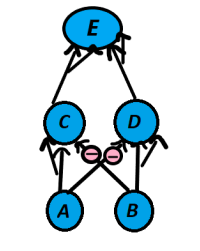

***3. Why is it generally preferable to use a Logistic Regression classifier rather than a
   classical Perceptron (i.e., a single layer of threshold logic units trained using the
   Perceptron training algorithm)? How can you tweak a Perceptron to make it
   equivalent to a Logistic Regression classifier?***
   
A: A classical logistic regression classifer is better than a perceptron because=perceptrons do not output a class probabilty. instead they make a prediction based on a hard threshold. This could be solved by stacking several perceptrons. This is known as a multilayer perceptron (MLP). Now with this, it would output a 0 or 1 as the perceptron fires. 

***4. Why was the logistic activation function a key ingredient in training the first
   MLPs?***
   
A: The reason that the logistic (or sigmoid) activation function was used in training was because step functions were only associated with flat segments. With this there wasn't any actual gradients to work with. So with the sigmoid function gradient descent could actually make proress at each sucessive step. 

***5. Name three popular activation functions. Can you draw them?***

A: 

1. ReLU
2. TanH
3. Sigmoid

Drawings shown below: 

ReLU
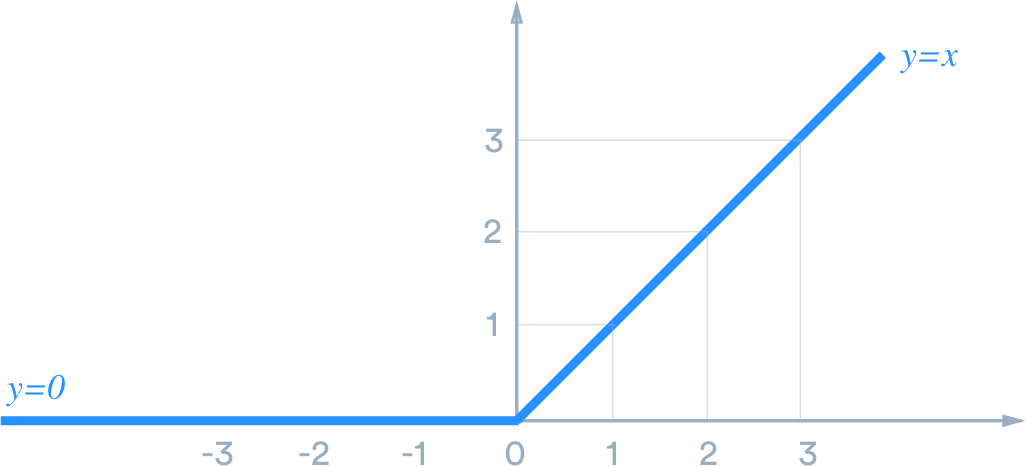

TanH
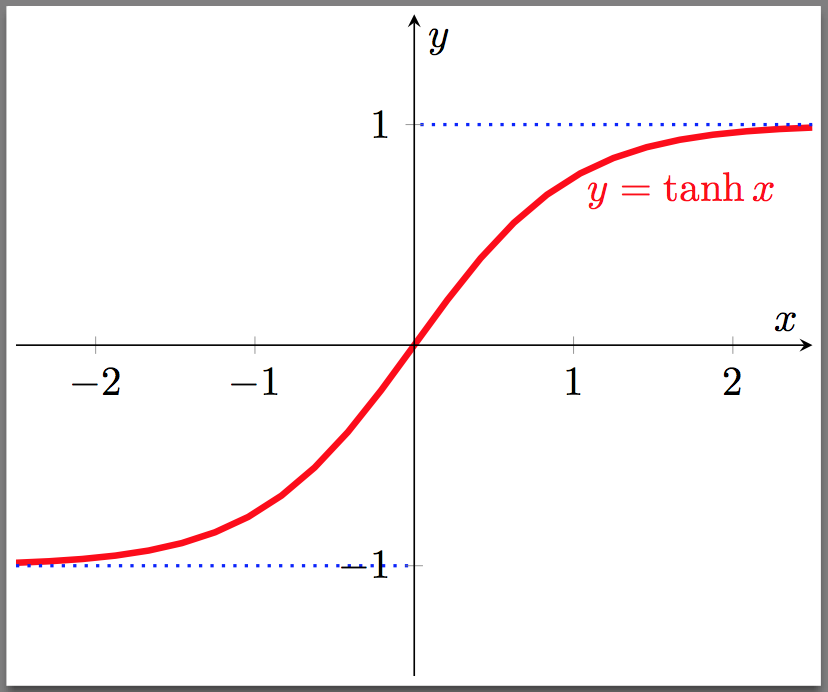

Sigmoid
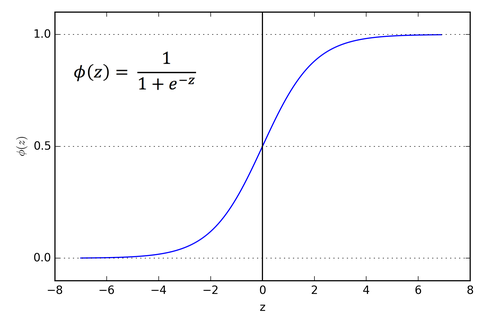

***6. Suppose you have an MLP composed of one input layer with 10 passthrough
   neurons, followed by one hidden layer with 50 artificial neurons, and finally one
   output layer with 3 artificial neurons. All artificial neurons use the ReLU activa‐
   tion function.
   • What is the shape of the input matrix X?
   • What are the shapes of the hidden layer’s weight vector Wh
     and its bias vector bh?
   • What are the shapes of the output layer’s weight vector Wo
     and its bias vector bo?
   • What is the shape of the network’s output matrix Y?
   • Write the equation that computes the network’s output matrix Y as a function
   of X, Wh, bh, Wo, and bo.***
   
A: Let's break this down piece by piece keeping in mind the linear algebra needed to make this work. We start with our training data and the input data we are feeding into the 10 neurons. Let's say for example the training size is represented by size *m*.

Then, that *m*X10 matrix shape is passed along into the 50 articial nerons ones in the hidden layer. With that in mind the hidden layer's weight vector would be a 10X50 matrix now and the bias vector would be of size 50 for the 50 neurons

From here, we move onto the output layer weight vector. We are now feeding data out of the 50 neurons so it will be a 50 by something matrix. We note the output layer has 3 neurons. So that will our shape. 50X3 with the bias vector of length 3.

The shape of the output matrix is what we started with multiplid by the output neurons. So we are left with the output matrix shape *m*X3 which makes sense with matrix multiplication for our input and output matrices. Here we have *m*X10 * 10X50 which gives us a *m*X50 matrix. Then we have a *m*X50 * 50X3 which gives us *m*X3 as our output matrix!

The function would be represented as: Y* = ReLU(ReLU(X Wh + bh) Wo + bo)

***7. How many neurons do you need in the output layer if you want to classify email
   into spam or ham? What activation function should you use in the output layer?
   If instead you want to tackle MNIST, how many neurons do you need in the out‐
   put layer, and which activation function should you use? What about for getting
   your network to predict housing prices, as in Chapter 2?***
   
A: One neuron. The neural would still fire and it would either return a probability for spam and the probability for ham email. A simple logistic function should work fine for this case. For the MNIST case, you need 10 neurons with a probability for each case prediction for the picture representing the corresponding digit. For the MNIST dataset, I would use a softmax function because a softmax regressor (From chapter 4) can handle multiple classes for our model. For housing prices, the output would be predicting the house price, which is one output... So this would be one output neuron and you wouldn't need an activation function because it a price that can vary widely based on the inputs fed through the network. This wouldn't be a classification problem.

***8. What is backpropagation and how does it work? What is the difference between
   backpropagation and reverse-mode autodiff?***
   
A: Backprop us an algorithm used to train neural networks. First, the algorithm makes a prediction on the data (Also known as forward pass) and then measures the error on that prediction with regards to neuron weights. Then, it goes backwards (hence the name) to measure the errors for each connection (reverse pass) and then finally, tweaks the weights in each layer to reduce the error (AKA Gradient Descent). The different between backprop and reverse-mode autodiff is that backprob is the whole algorithm with several backprop steps involved while training, where reverse-mode autodiff is a technique to compute the gradients effectively during gradient descent (1 step of backprop). 

***9. Can you list all the hyperparameters you can tweak in a basic MLP? If the MLP
   overfits the training data, how could you tweak these hyperparameters to try to
   solve the problem?***
   
A: List:

- number of hidden layers
- number of neuron in hidden layers
- activation function used in hidden layers and output layer

This overfitting can be fixed by tweaking the number of hidden layers and changing (reducing) the number of neurons in the hidden layer. 

In [1]:
# Question #10
'''10. Train a deep MLP on the MNIST dataset (you can load it using keras.data
    sets.mnist.load_data(). See if you can get over 98% precision. Try searching
    for the optimal learning rate by using the approach presented in this chapter (i.e.,
    by growing the learning rate exponentially, plotting the loss, and finding the
    point where the loss shoots up). Try adding all the bells and whistles—save
    checkpoints, use early stopping, and plot learning curves using TensorBoard.'''

import tensorflow as tf
from tensorflow import keras
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [2]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


The dataset is the same size as the set from scikit-learn with 28x28 pixel images. We also can note each pixel intensity is represented as a byte (0 to 255) for pixel ratio. We can also view the datatypes of each instance below:

In [3]:
X_train.dtype

dtype('uint8')

Let's start by splitting the dataset again into a smaller subset so we can also include a validation set for X and y and then similar to what we did with the fashion dataset, we will shrink the pixel intensity between 0 and 1 by dividing by 255:

In [4]:
X_val, X_train_sub = X_train[:5000] / 255., X_train[5000:] / 255.
y_val, y_train_sub = y_train[:5000], y_train[5000:]
X_test = X_test / 255.

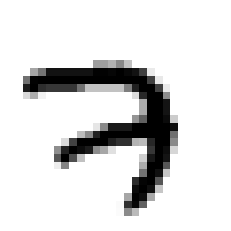

In [5]:
plt.imshow(X_train_sub[0], cmap="binary")
plt.axis('off')
plt.show()

The dataset already has labels numbered 0-9 so we don't have to worry about that. The ID is self explanatory

In [6]:
y_train_sub

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

Let's plot a 3X10 array of some of the sample values we can view:

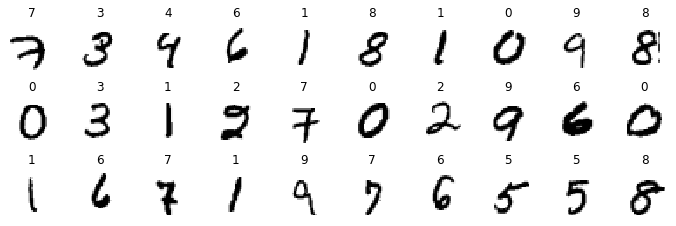

In [7]:
n_rows = 3
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train_sub[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train_sub[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Let's use the keras API to build a function that can store both the learning rates and the loss measures per rate in 2 simple arrays. This is also similar to using using cyclical learning rates with a range test from Smith (2015) https://arxiv.org/pdf/1506.01186v2.pdf (Only with mine we will measure loss where Leslie N. Smith did it with accuracy)

In [8]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = [] #rates array
        self.losses = [] # losses array
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate)) # append learning rate to array
        self.losses.append(logs["loss"]) # append loss value to array
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [9]:
keras.backend.clear_session()

Now let's build the model. Let us build a sequential model where we flatten the inputs to a 28X28 array and then 2 relu dense layers. Then finally an output dense layer with a softmax activation function.

In [14]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(400, activation="relu"),
    keras.layers.Dense(150, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

We now compile our model with a learning rate starting at 1e-5 and we can grow it by a factor of 1% each iteration using our class object we built:

In [15]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-5),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.01)

In [16]:
# train the model now
history = model.fit(X_train_sub, y_train_sub, epochs=1,
                    validation_data=(X_val, y_val),
                    callbacks=[expon_lr])

Train on 55000 samples, validate on 5000 samples
55000/55000 [==============================] - 5s 97us/sample - loss: nan - accuracy: 0.3104 - val_loss: nan - val_accuracy: 0.0958


As we can see, our accuracy is not very good.. Let us plot the Loss function against the learning rate regardless.

Text(0, 0.5, 'Loss')

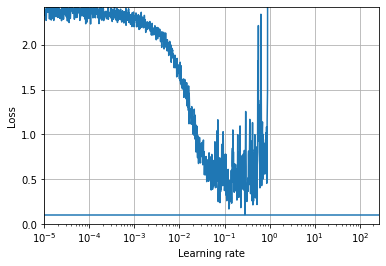

In [17]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

It looks like our graph starts to shoot back up quite a bit after 0.5. So let us use something around that value and build a new model and train:

In [18]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(400, activation="relu"),
    keras.layers.Dense(150, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [19]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.2),
              metrics=["accuracy"])

In [20]:
# Log to library to view later with tensorboard
import os
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'.\\my_mnist_logs\\run_001'

Now let's fit train our model with some model checkpoints and early stopping:

In [21]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=25)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train_sub, y_train_sub, epochs=100, batch_size=64,
                    validation_data=(X_val, y_val),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Train on 55000 samples, validate on 5000 samples
Epoch 1/100
55000/55000 [==============================] - 3s 52us/sample - loss: 0.2761 - accuracy: 0.9167 - val_loss: 0.1319 - val_accuracy: 0.9646
Epoch 2/100
55000/55000 [==============================] - 2s 39us/sample - loss: 0.1061 - accuracy: 0.9681 - val_loss: 0.0816 - val_accuracy: 0.9766
Epoch 3/100
55000/55000 [==============================] - 2s 41us/sample - loss: 0.0705 - accuracy: 0.9784 - val_loss: 0.1414 - val_accuracy: 0.9526
Epoch 4/100
55000/55000 [==============================] - 2s 39us/sample - loss: 0.0512 - accuracy: 0.9837 - val_loss: 0.0772 - val_accuracy: 0.9764
Epoch 5/100
55000/55000 [==============================] - 2s 38us/sample - loss: 0.0367 - accuracy: 0.9890 - val_loss: 0.1233 - val_accuracy: 0.9564
Epoch 6/100
55000/55000 [==============================] - 2s 41us/sample - loss: 0.0269 - accuracy: 0.9919 - val_loss: 0.0712 - val_accuracy: 0.9808
Epoch 7/100
55000/55000 [==========================

In [22]:
model = keras.models.load_model("my_mnist_model.h5") # rollback to best model
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 68us/sample - loss: 0.0578 - accuracy: 0.9833


[0.05778030508286611, 0.9833]